# Latar Belakang
Sebuah perusahaan yang bergerak di bidang data, ingin merekrut *data scientist* untuk Sistem transportasi umum. sistem tersebut memiliki peran penting dalam mobilitas penduduk di kota metropolitan seperti Jakarta, Indonesia. Salah satu sistem transportasi umum yang penting di Jakarta adalah Transjakarta, yang mengoperasikan layanan bus rapid transit (BRT). Dalam upaya untuk lebih memahami penggunaan sistem ini dan meningkatkan efisiensi serta kualitas layanannya, Transjakarta telah mengumpulkan sejumlah data terkait perjalanan pelanggan.

Dataset Transjakarta yang telah terkumpul mencakup beragam informasi terkait demografis, penggunaan kartu, dan detail perjalanan. Data ini mencerminkan pola perjalanan pelanggan serta karakteristik kartu yang digunakan untuk akses ke sistem transportasi ini. Analisis data yang cermat dan mendalam terhadap dataset ini memiliki potensi untuk memberikan wawasan yang berharga yang dapat digunakan untuk perbaikan layanan dan pengambilan keputusan yang lebih baik.

# Pernyataan Masalah
Perusahaan ingin mengetahui **korridor mana saja yang padat dan karakteristik pengguna Transjakarta**. Informasi ini akan membantu perusahaan untuk efektifitas layanan maupun meningkatkan efisiensi layanan publik Transjakarta. Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

- **Bagaimana karakteristik secara umum pengguna Transjakarta berdasarkan berbagai kategori?**
- **Bagaimana mengetahui tempat-tempat pada di Transjakarta beserta waktunya agar efektifitan dan kenyamanan pengguna tetap terjamin?**
- **Bagaimana penyebaran data pengguna kartu?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import folium

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 22 kolom di dalam dataset Transjakarta, yaitu:  

1. transID: ID transaksi unik untuk setiap transaksi.
2. payCardID: Identifikasi utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
3. payCardBank: Nama bank penerbit kartu pelanggan.
4. payCardName: Nama pelanggan yang terdapat dalam kartu.
5. payCardSex: Jenis kelamin pelanggan yang terdapat dalam kartu.
6. payCardBirthDate: Tahun kelahiran pelanggan.
7. corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. corridorName: Nama Koridor / Nama Rute yang mencakup titik awal dan titik akhir untuk setiap rute.
9. direction: 0 untuk Berangkat, 1 untuk Kembali. Arah rute.
10. tapInStops: ID Tap In (Masuk) untuk mengidentifikasi nama-nama halte.
11. tapInStopsName: Nama Halte Tap In (Masuk) tempat pelanggan masuk.
12. tapInStopsLat: Garis lintang Halte Tap In (Masuk).
13. tapInStopsLon: Garis bujur Halte Tap In (Masuk).
14. stopStartSeq: Urutan halte, 1st stop, 2nd stop, dll. Berkaitan dengan arah.
15. tapInTime: Waktu Tap In. Tanggal dan waktu.
16. tapOutStops: ID Tap Out (Keluar) untuk mengidentifikasi nama-nama halte.
17. tapOutStopsName: Nama Halte Tap Out (Keluar) tempat pelanggan keluar.
18. tapOutStopsLat: Garis lintang Halte Tap Out (Keluar).
19. tapOutStopsLon: Garis bujur Halte Tap Out (Keluar).
20. stopEndSeq: Urutan halte, 1st stop, 2nd stop, dll. Berkaitan dengan arah.
21. tapOutTime: Waktu Tap Out. Tanggal dan waktu.
22. payAmount: Jumlah yang dibayarkan oleh pelanggan. Beberapa gratis, beberapa tidak.

dibuat beberapa kolom baru di antaranya :

23. transJakartaClass : membagi klasfifikasi kelas payAmount menjadi [subsidi, regular, premium]  
24. tapInHour : waktu tap in               
25. tapOutHour : waktu tap out        
26. tapDay : hari pada saat melakukan tap           
27. age  : usia per-ID                
28. ageGroup : kelompok usia       
29. ageGroupK : ageGroup dengan berbagai kategori           
30. weekCategory : pembagian waktu weekdays dan weekend  

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [2]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df = pd.read_csv('Transjakarta.csv')
display(df.head(), df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Deskripsikan isi masing-masing kolom secara statistik

In [ ]:
df.describe() 

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [ ]:
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


### Mengecek Data unique setiap kolom beserta jumlahnya
- Number of Unique : Banyak jumlah Kolom Unik
- Unique Sample : Banyaknya data unik

In [ ]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
list_item = []
for col in df.columns :
    list_item.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara Umum kita dapat melihat bahwa :
- dataset Transjakarta memiliki **22** kolom (columns) dan **37899** baris (row)
- beberapa kolom memiliki data kosong seperti **corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount**
  data tersebut diwakilkan dengan NaN
- kolom **transID** berisi transaksi ID dan tidak ada yang perlu di analisis sehingga bisa saja di drop, kecuali akan dimanfaatkan menjadi banyaknya jumlah data karena datanya Unique setiap baris. Namun, untuk fungsi tersebut bisa diwakilkan oleh kolom lain sehingga lebih baik di drop

### **Missing Value**

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

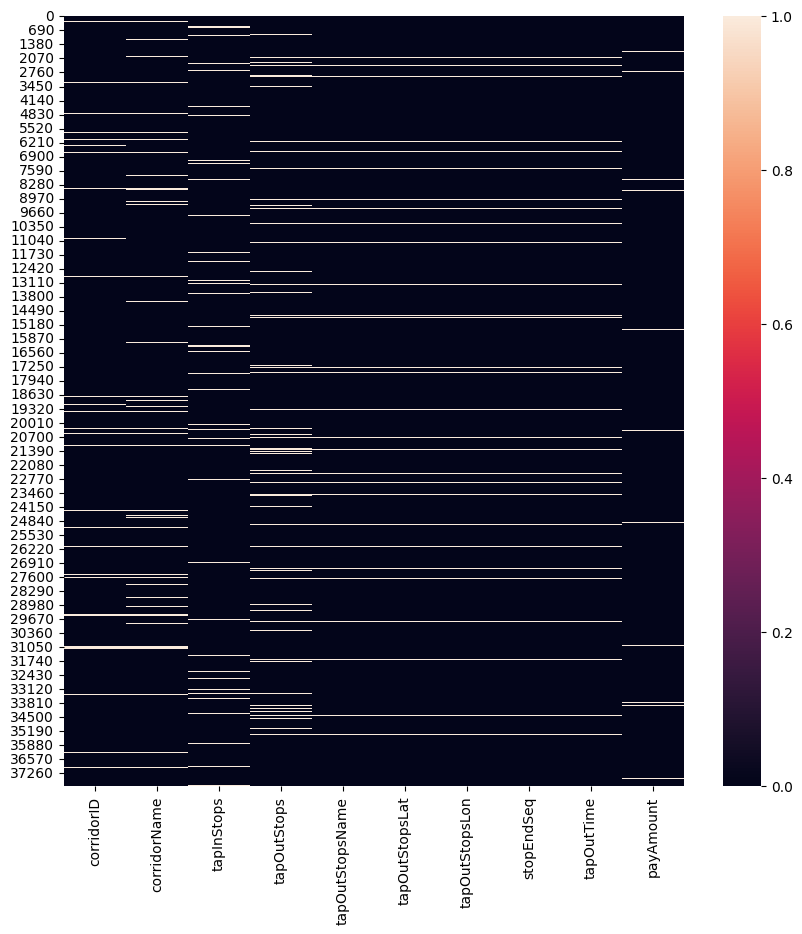

In [ ]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq', 'tapOutTime', 'payAmount']].isna())

### **Data Cleaning**
- Pertama, seprtinya ada korelasi antara corridorID dan corridorName sehingga dicoba untuk di hubungkan satu sama lain untuk saling isi missing valuesnya

In [ ]:
coridor_name = df[df['corridorName'].isnull()]['corridorID'].unique()
coridor_name

array([nan, '5M', '2', 'T21', '12A', 'M3', 'M11', 'JAK.13', 'JAK.22',
       '8K', 'JAK.27', '9H', '11D', 'JAK.75', 'JAK.84', 'JAK.120', '6Q',
       '12C', 'D32', '6N', '3A', '14', '12P', '10K', '6B', 'JAK.21',
       'JAK.47', '1', '11N', '2P', 'JAK.17', '1F', 'JAK.10', 'JAK.32',
       'JAK.42', 'JAK.02', '9D', 'JAK.117', '9N', '4B', 'JAK.14', '2E',
       '7C', '8C', '6D', '8E', '11P', '9A', 'JAK.44', '5C', '7Q',
       'JAK.50', '7P', 'JAK.36', 'JAK.16', 'JAK.115', 'JAK.41', '8', '5',
       'JAK.110A', '3C', 'M4', '6V', 'B21', 'M7B', '10', 'S31', '2H',
       'JAK.26', 'JAK.48B', 'JAK.64', '6C', 'JAK.85', 'JIS3', 'JAK.52',
       '12B', '11Q', '1P', 'M2', '11K', 'M8', '3B', 'JAK.49', '1Q', '5F',
       'JAK.112', 'JAK.46', 'JAK.77', '7D', 'JAK.19', 'JAK.23', '1N',
       'JAK.51', 'JAK.25', '13', 'JAK.88', 'JAK.03', 'JAK.48A', 'JAK.06',
       'JAK.43B', 'JAK.29', '4F', 'M1', '13C', '3F', '1M', 'S21', '9E',
       '2F', '4', 'M9', 'JAK.07', '10B', '3H', '1C', 'JAK.43C', 'JAK.20',

In [ ]:
df_coridor = df[['corridorID', 'corridorName']]
df_coridor['corridorID'].nunique()


221

In [ ]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [ ]:
corridor_map = dict(zip(df["corridorName"], df["corridorID"]))
corridor_map

{'Matraman Baru - Ancol': '5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 nan: '3B',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok 

- Dari keterangan diatas diketahui bahwa corridorID **3B** tidak memiliki CorridorName, sehingga kami mencari merupakan jurusan **rumah susun Flamboyan - Kalideres**
- corridorName **'Rusun Marunda - Terminal Terpadu Pulo Gebang'**  tidak memiliki corridorID, sehingga kami mencari corridorID untuk halte tersebut adalah **JAK.110A**
https://moovitapp.com/index/id/Tranportasi_Umum-line-JAK110A-Jakarta-2044-2026517-111162611-0

In [ ]:
df["corridorID"] = df["corridorName"].replace(corridor_map)
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           150
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [ ]:
# df.dropna(subset=['corridorID'], inplace=True)

df.loc[(df['corridorID'] == '3B') & (df['payAmount'] == 20000)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,3B,NaN,1.0,B00589P,...,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0
812,FISF015Q7H16JF,213129225555184,emoney,Tgk. Cagak Zulaika,F,1993,3B,NaN,0.0,B00611P,...,106.80560,12,2023-04-04 05:13:24,B00221P,Bundaran Senayan 1,-6.227445,106.80187,14.0,2023-04-04 06:03:23,20000.0
1317,RCYE922D1I48MY,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,3B,NaN,1.0,B00808P,...,106.61473,10,2023-04-05 06:26:48,B02557P,Palem Semi 2,-6.220361,106.61649,12.0,2023-04-05 06:51:32,20000.0
3734,ADYP884O6W29HG,345711968178505,emoney,Kawaya Oktaviani,M,2009,3B,NaN,1.0,B00102P,...,106.82847,0,2023-04-11 05:39:26,B00360P,Flyover Karet 2,-6.214808,106.81847,11.0,2023-04-11 06:19:41,20000.0
4179,DRSV959S7U97MK,4693229754928686,dki,Laila Pratama,F,1986,3B,NaN,0.0,B00148P,...,106.72865,0,2023-04-11 17:20:04,B05488P,St. MRT Fatmawati,-6.292589,106.79360,2.0,2023-04-11 18:26:01,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36417,ODAN385Q6H33NS,630419596436,flazz,"Hani Ardianto, S.Ked",F,1997,3B,NaN,1.0,B01839P,...,106.81878,7,2023-04-17 13:41:39,B00248P,Cibubur Junction,-6.368735,106.89366,11.0,2023-04-17 14:03:18,20000.0
36617,IFLG072B3B95QT,630419596436,flazz,"Hani Ardianto, S.Ked",F,1997,3B,NaN,0.0,B02414P,...,106.80710,4,2023-04-17 20:37:13,B00611P,Gelora Bung Karno 1,-6.224642,106.80560,5.0,2023-04-17 21:30:26,20000.0
36692,VPZW892H1H23FC,3567474399039094,dki,Pia Lailasari,F,1995,3B,NaN,0.0,B02397P,...,106.99200,3,2023-04-17 15:06:04,B00664P,GOR Sumantri 2,-6.221038,106.83189,11.0,2023-04-17 16:48:39,20000.0
37092,CXZX124J5L61BQ,3567474399039094,dki,Pia Lailasari,F,1995,3B,NaN,0.0,B02397P,...,106.99200,3,2023-04-18 20:51:54,B00664P,GOR Sumantri 2,-6.221038,106.83189,11.0,2023-04-18 22:26:25,20000.0


Di data payAmount hanya '3B' yang memiliki unique lebih dari 1. (0, 3500, 20000) dan setelah diterlusuri corridorID '3B' masuk kedalam beberapa kategori armada sehingga kami klasifikasikan
3B.RT = Premium (Royal Trans)
3B.TJ = Regululer
3B.S = Subsidi (Jaklingko)

In [ ]:
df.loc[(df['corridorID'] == '3B') & (df['payAmount'] == 20000), 'corridorID'] = '3B.RT'
df.loc[(df['corridorID'] == '3B') & (df['payAmount'] == 3500), 'corridorID'] = '3B.TJ'
df.loc[(df['corridorID'] == '3B') & (df['payAmount'] == 0), 'corridorID'] = '3B.S'

In [ ]:
df.loc[df['corridorID'] == '3B.S', 'corridorName'] = 'Rusun Flamboyan-kalideres (S)'
df.loc[df['corridorID'] == '3B.TJ', 'corridorName'] = 'Rusun Flamboyan-kalideres (TJ)'
df.loc[df['corridorID'] == '3B.RT', 'corridorName'] = 'Rusun Flamboyan-kalideres (RT)'
df.loc[df['corridorName'] == 'Rusun Marunda - Terminal Terpadu Pulo Gebang', 'corridorID'] = 'JAK.110A'
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName          49
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Moda Transjakarta terbagi menjadi 3 jenis moda yaitu, Royal Trans, Tranjakarta, dan JakLingko ( Transformasi layanan OK-Otrip yang merupakan sistem transportasi yang terintegrasi)
- Royal Trans merupakan layanan premium untuk Transjakarta (tarif 20000)
- Transjakarta merupakan layanan reguler tanpa subsidi (3500)
- Jaklingko merupakan transformasi layanan OK-Otrip yang merupakan sistem transportasi yang terintegrasi (0)

untuk payAmount akan di kategorikan menjadi layanan Premium (20000), Reguler (3500), Subsidi (0)

List Data payAmount akan di cek per kategori sesuai dengan corridorID

In [ ]:
df[df['corridorID'] == '3B']['payAmount'].unique()

array([nan])

Data 3B terlalu banyak dan terlihat seperti anomali begitu di hitung jumlah variablenya ternyata merupakan outlier bahkan saat sudah di bagi menjadi 3. jadi diputuskan untuk di drop untuk data yang terdeteksi outlier dan disisakan rute khusus Royal Trans karena hanya berisi 84

In [ ]:
anomali = df['corridorID'].value_counts().reset_index()
anomali.head()

,corridorID,count
0,3B.S,1039
1,3B.TJ,935
2,1T,391
3,S21,383
4,2,343


<Axes: xlabel='count'>

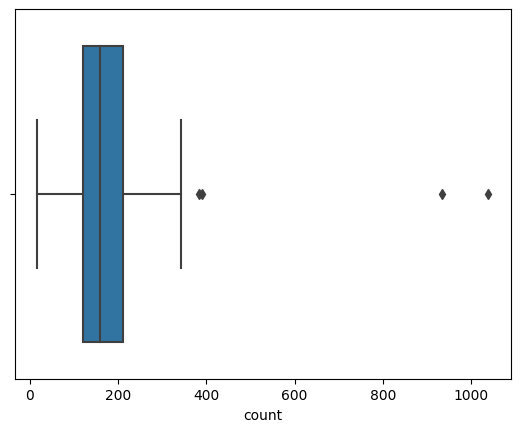

In [ ]:
sns.boxplot(data=anomali, x='count')

In [ ]:
Drop3B = df.loc[df['corridorID'] == '3B.S'].index
Drop3B_tj = df.loc[df['corridorID'] == '3B.TJ'].index

df=df.drop(Drop3B)
df=df.drop(Drop3B_tj)

Menghapus missing values [tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime] karena memiliki kesamaan data pada missing values sehingga tidak bisa di analisis dan di cari tahu. data yang hilang tersebut sekitar 3.5% dan dapat di drop

In [ ]:
# Menghapus sisa yang terdapat Missing Value
df.dropna(subset=['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'], inplace=True)

Dari keterangan data di atas, terlihat bahwa **tapInStops : tapInStopsName & tapOutStops : tapOutStopsName** memiliki keterkaitan seperti kolom corridor sehingga dapat di isi untuk missing valuesnya

In [ ]:
tap_in_stop = dict(zip(df["tapInStopsName"], df["tapInStops"]))
tap_out_stop = dict(zip(df["tapOutStopsName"], df["tapOutStops"]))

display(tap_in_stop, tap_out_stop)

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Lippo Mall Kramat Jati': 'B02144P',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 'Phe Tower Kebagusan': 'B02831P',
 'Balai Kota 1': 'B00102P',
 'Cikoko Stasiun Cawang Arah Barat': 'P00039',
 'Lebak Bulus': 'P

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamulya III': 'B03885P',
 'Monas 3': 'B02477P',
 'Pecenongan': '

In [ ]:
df["tapInStops"] = df["tapInStopsName"].replace(tap_in_stop)
df["tapInStops"] = df["tapInStopsName"].replace(tap_out_stop)
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName         47
direction             0
tapInStops          487
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops         892
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           968
dtype: int64

In [ ]:
this = df[df['tapInStops'].isna()]['tapInStopsName'].unique()
this

array(['Duren Tiga', 'Ragunan', 'Walikota Jakarta Timur',
       'Perumnas Klender', 'Sekolah Tarsisius 2', 'SDN 01 02 03',
       'Sbr. Ps. Pisang', 'FX Sudirman', 'Sbr. Jl H Emuntipala I',
       'Jln. Bungur Besar VI', 'Kel. Cibubur', 'Kebagusan Raya',
       'Masjid Al Waqof', 'Univ. Tarumanegara 2', 'Gg. H Piran',
       'Teuku Nyak Arief', 'Exit Tol Veteran Bintaro', 'SMAN 28',
       'Pramuka LIA', 'Term. Grogol', 'Term. Muara Angke 2',
       'Rest Area TMII', 'Sbr. Persada Purnawira Halim',
       'Taman Rasuna Tower 17', 'Benhil 2'], dtype=object)

Dari data tapInStopsName diatas, bisa di isi beberapa missing values dari tapInStops

In [ ]:
df.loc[df['tapInStopsName'] == 'Ragunan', 'tapInStops'] = 'P00199'
df.loc[df['tapInStopsName'] == 'Walikota Jakarta Timur', 'tapInStops'] = 'P00270'
df.loc[df['tapInStopsName'] == 'Sekolah Tarsisius 2', 'tapInStops'] = 'B04661P'
df.loc[df['tapInStopsName'] == 'SDN 01 02 03', 'tapInStops'] = 'B03334P'
df.loc[df['tapInStopsName'] == 'Sbr. Ps. Pisang', 'tapInStops'] = 'B04168P'
df.loc[df['tapInStopsName'] == 'Kebagusan Raya', 'tapInStops'] = 'B01857P'
df.loc[df['tapInStopsName'] == 'FX Sudirman', 'tapInStops'] = 'B00378P'
df.loc[df['tapInStopsName'] == 'Sbr. Jl H Emuntipala I', 'tapInStops'] = 'B03886P'
df.loc[df['tapInStopsName'] == 'Perumnas Klender', 'tapInStops'] = 'P00174'
df.loc[df['tapInStopsName'] == 'Jln. Bungur Besar VI', 'tapInStops'] = 'B00962P'

df.isna().sum()



transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName         47
direction             0
tapInStops          140
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops         892
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           968
dtype: int64

In [ ]:
df["tapOutStops"] = df["tapOutStopsName"].replace(tap_out_stop)
df["tapOutStops"] = df["tapOutStopsName"].replace(tap_in_stop)
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName         47
direction             0
tapInStops          140
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops         981
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           968
dtype: int64

Ada sekitar data tapInStops dan tidak bisa ditemukan karena nilainya NaN. Sehingga harus di drop sebanyak 147 data atau sekitar 0.0038%

In [ ]:
df.dropna(subset=['tapInStops'], inplace=True)

In [ ]:
df[df['tapOutStops'].isna()]['tapOutStopsName'].unique()

array(['Term. Muara Angke 2', 'Nifarro Park', 'JPO Blok G', 'Jati Padang',
       'Dukuh Atas 3', 'Mayestik', 'Gunung Sahari Mangga Dua',
       'Pospol Jati Bunder', 'RS Medika Permata Hijau 4',
       'Jembatan Merah', 'Pasar Baru Timur', 'Harmoni Arah Utara',
       'Senayan JCC Arah Timur', 'SPBU Jln. DI Panjaitan',
       'Jln. Tebet Timur Dalam VIII J', 'Senen', 'Melati Mas Residence 2',
       'Simpang Otista III Selatan', 'DPR MPR 2', 'Pesakih 2', 'Galur',
       'Jln. Tebet Barat Raya', 'Gerbang Tol Bambu Apus 2', 'Bidara 2',
       'RS Harapan Bunda', 'Gelora Bung Karno 2',
       'Sbr. Gg. Mushola Baburrahman', 'Sbr. Kel. Kayu Putih',
       'Sbr. Koko Semesta', 'St. Klender 2',
       'Sbr. Klinik Yadika Petukangan', 'Jln. Veteran 2',
       'SPBU Limo Cinere 1', 'RS Pluit', 'Sbr. Jln. R. Anggun',
       'Simpang Kramat Jaya Baru 4', 'Al Khairiyah School',
       'Pusdiklat Pajak Jln. Sakti IV', 'Sbr. RPTRA Pesona Manggarai',
       'Grha Muncul Mekar', 'SPBU Jln. Guru', 'G

In [ ]:
df.loc[df['tapOutStopsName'] == 'JPO Blok G', 'tapOutStops'] = 'B01787P'
df.loc[df['tapOutStopsName'] == 'Jati Padang', 'tapOutStops'] = 'P00085'
df.loc[df['tapOutStopsName'] == 'Dukuh Atas 3', 'tapOutStops'] = 'B00325P'
df.loc[df['tapOutStopsName'] == 'Jembatan Merah', 'tapOutStops'] = 'P00092'
df.loc[df['tapOutStopsName'] == 'Mayestik', 'tapOutStops'] = 'P00136'
df.loc[df['tapOutStopsName'] == 'Pospol Jati Bunder', 'tapOutStops'] = 'B02972P'
df.loc[df['tapOutStopsName'] == 'RS Medika Permata Hijau 4', 'tapOutStops'] = 'B03151P'
df.loc[df['tapOutStopsName'] == 'Pasar Baru Timur', 'tapOutStops'] = 'P00148'
df.loc[df['tapOutStopsName'] == 'Harmoni Arah Utara', 'tapOutStops'] = 'P00291'
df.loc[df['tapOutStopsName'] == 'Senayan JCC Arah Timur', 'tapOutStops'] = 'P00218'
df.loc[df['tapOutStopsName'] == 'SPBU Jln. DI Panjaitan', 'tapOutStops'] = 'B06573P'
df.loc[df['tapOutStopsName'] == 'Jln. Tebet Timur Dalam VIII J', 'tapOutStops'] = 'B06706P'
df.loc[df['tapOutStopsName'] == 'Senen', 'tapOutStops'] = 'P00219'
df.loc[df['tapOutStopsName'] == 'Simpang Otista III Selatan', 'tapOutStops'] = 'B05021P'
df.loc[df['tapOutStopsName'] == 'DPR MPR 2', 'tapOutStops'] = 'B00322P'

151 data diatas adalah missing values yag tidak bisa dicari datanya, sehingga diputuskan untuk di drop karena memang hanya sekitar 0.0039% dari data

In [ ]:
df.dropna(subset=['tapOutStops'], inplace=True)

Untuk PayAmount ada 967 data missing values dan akan di isi berdasarkan hubungan dengan kolom corridor id karena ada keterikatan harga

In [ ]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.426700e+04,34267.000000,34267.000000,34267.000000,34267.000000,34267.000000,34267.000000,34267.000000,34267.000000,33300.000000
mean,4.144797e+17,1990.191876,0.501445,-6.215423,106.842228,13.579508,-6.215250,106.841952,21.252225,2766.381381
std,1.305905e+18,12.988170,0.500005,0.057650,0.059941,12.203954,0.058759,0.060664,13.770266,4325.321847
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800384e+14,1982.000000,0.000000,-6.245863,106.804020,4.000000,-6.247225,106.801880,11.000000,0.000000
50%,3.507251e+15,1990.000000,1.000000,-6.214787,106.835350,11.000000,-6.215023,106.834892,18.000000,3500.000000
75%,4.684821e+15,2001.000000,1.000000,-6.176248,106.882880,19.000000,-6.175680,106.883810,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [ ]:
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,34267,34267,34267,34267,34267,34220,34267,34267,34267,34267,34267,34267
unique,34267,6,1962,2,217,216,2473,2473,33601,2159,2159,33702
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-04 20:16:01,P00016,BKN,2023-04-19 07:31:23
freq,1,16895,76,18214,375,375,226,226,3,293,293,3


In [ ]:
ini = df[df['payAmount'] == 0]['corridorID'].unique()
pd.DataFrame(data = ini)

,0
0,JAK.46
1,JAK.88
2,JAK.16
3,JAK.02
4,BW9
...,...
92,JAK.106
93,JAK.28
94,JAK.53
95,JAK.99


In [ ]:
df[df['payAmount'] == 0]['corridorID'].unique()

array(['JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', 'BW9', 'JAK.15', 'JAK.112',
       'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06', 'JAK.14', '3A', '3C',
       'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19', 'JAK.75', 'JAK.37',
       'JAK.31', '11M', 'JAK.43C', '2F', 'JAK.117', 'JAK.49', 'JAK.20',
       'JAK.118', 'JAK.27', '4E', 'JAK.84', '2H', 'JAK.08', 'JAK.23',
       'JAK.07', 'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C',
       'JAK.01', 'JAK.120', 'JAK.85', '11N', 'JAK.10', '2E', 'JAK.41',
       'JAK.86', '9F', '11P', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29',
       'JAK.45', 'JAK.18', 'JAK.51', 'JAK.54', 'JAK.110A', 'JAK.03',
       'JAK.25', 'JAK.39', 'JAK.80', 'JAK.11', 'JAK.17', '11K', '10B',
       'JAK.52', 'JAK.13', 'JAK.22', 'JAK.30', 'JAK.58', 'JAK.34', '10A',
       'JAK.72', 'JAK.74', 'JAK.60', 'JAK.56', 'JAK.59', 'JAK.113',
       'JAK.04', 'JAK.40', '12F', 'JAK.61', 'JAK.24', '11C', 'JAK.35',
       'JAK.38', 'JAK.33', 'JAK.05', '11B', 'JAK.106', 'JAK.28', 'JAK.53',
  

In [ ]:
# Mengisi Missing Value di 'payAmount' berdasarkan 'corridorID' untuk corridor dengan kode JAK semua bernilai 0
df.loc[df['corridorID'] == 'JAK', 'payAmount'].fillna(0, inplace=True)


In [ ]:
df[df['payAmount'] == 3500]['corridorID'].unique()

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', '9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '6N', 'M11', '9N', '2', '7P', '13B', 'M7',
       '9D', 'M8', 'B21', '12A', '8K', 'M10', '10D', 'B11', '8C', '12B',
       '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M', 'L13E', '12P',
       '1F', '13C', '4B', '7C', '2A', 'M3', '8A', '1E', 'M4', '9H', '5N',
       '6T', '5F', '2P', 'S21', 'M12', '1N', '6U', '10', '2B', '10K',
       '6A', '4F', '6B', '5B', 'M6', '8', '3F', 'S11', '6D', '13D', '1H',
       '4C', 'M13', '8D', '4D', '7', '9C', 'D21', 'D11', '8M', '1B', '7F',
       '6', '10H', '3E', '12H', '1A', '2Q', '1R', '7B'], dtype=object)

In [ ]:
df[df['payAmount'] == 20000]['corridorID'].unique()

array(['1T', 'B14', '3B.RT', 'T21', 'D32', 'S31', 'B13', 'D31', '1K',
       '6P', 'S12'], dtype=object)

In [ ]:
# Mengisi missing value untuk payAmount dengan klasifikasi harga

def fill_payAmount(baris):
    if baris['corridorID'] in ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']:
        return 20000
    elif baris['corridorID'] in ['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', '9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '3B', '6N', 'M11', '9N', '2', '7P', '13B',
       'M7', '9D', 'M8', 'B21', '12A', '8K', 'M10', '10D', 'B11', '8C',
       '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M', 'L13E',
       '12P', '1F', '13C', '4B', '7C', '2A', 'M3', '8A', '1E', 'M4', '9H',
       '5N', '6T', '5F', '2P', 'S21', 'M12', '1N', '6U', '10', '2B',
       '10K', '6A', '4F', '6B', '5B', 'M6', '8', '3F', 'S11', '6D', '13D',
       '1H', '4C', 'M13', '8D', '4D', '7', '9C', 'D21', 'D11', '8M', '1B',
       '7F', '6', '10H', '3E', '12H', '1A', '2Q', '1R', '7B']:
        return 3500
    else:
        return 0

# Isi payAmount
df['payAmount'] = df.apply(lambda baris: fill_payAmount(baris) if pd.isna(baris['payAmount']) else baris['payAmount'], axis=1)


In [ ]:
df.dropna(subset=['corridorName'], inplace=True)

Data Sudah Clean

In [ ]:
df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops          0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
transJakartaClass    0
tapInHour            0
tapOutHour           0
tapDay               0
age                  0
ageGroup             0
ageGroupK            0
weekCategory         0
dtype: int64

In [ ]:
df.to_excel('Transjakarta_clean.xlsx')

### **Data Preparation**
Membuat Kolom baru untuk jenis kelas pembayaran Transjakarta

In [ ]:
# Membuat kolom baru untuk jenis Transjakarta yang digunakan
def trans_jakarta_class(payAmount):
    if payAmount == 20000:
        return 'Premium'
    elif payAmount == 3500:
        return 'Regular'
    else:
        return 'Subsidi'

df['transJakartaClass'] = df['payAmount'].apply(trans_jakarta_class)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transJakartaClass
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Regular
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Regular
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,Simpang Kunir Kemukus,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Regular
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Regular
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Regular


In [ ]:
# Mengubah data type untuk tapInTime dan tapOutTime time menjadi datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])


In [ ]:
# Membuat kolom tapInHour dan tapOutHour untuk mengetahui lamanya perjalanan
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

In [ ]:
# membuat kolom hari untuk mengetahui jadwal transjakarta
df['tapDay'] = df['tapInTime'].dt.dayofweek

In [ ]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transJakartaClass,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Regular,5,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Regular,5,6,0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Regular,5,6,0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Regular,5,6,0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Regular,6,6,0


In [ ]:
# mengisi values untuk kolom tapDay menjadi hari
df['tapDay'] = df['tapDay'].replace({0:'Senin', 1:'Selasa', 2:'Rabu', 3:'kamis', 4:'Jumat', 5:'Sabtu', 6:'Minggu'})
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transJakartaClass,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Regular,5,6,Senin
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Regular,5,6,Senin
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Regular,5,6,Senin
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Regular,5,6,Senin
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Regular,6,6,Senin


In [ ]:
# Membuat kolom age
df['age'] = 2023 - df['payCardBirthDate']
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,transJakartaClass,tapInHour,tapOutHour,tapDay,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Regular,5,6,Senin,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Regular,5,6,Senin,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Regular,5,6,Senin,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Regular,5,6,Senin,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Regular,6,6,Senin,41


In [ ]:
df['age'].unique()

array([15, 26, 31, 45, 41, 30, 19, 39, 35, 21, 48, 12, 20, 42, 14, 40, 24,
       16, 63, 22, 33, 55, 38, 13, 34, 17, 32, 58, 18, 57, 29, 51, 54, 53,
       37, 23, 70, 46, 11, 36, 27, 52, 67, 43, 28, 49, 25, 50, 47, 64, 56,
       44, 77, 72, 66, 75, 62, 59, 60, 61, 74, 69, 76, 71, 68, 65, 73],
      dtype=int64)

Membuat tabel kelompok usia berdasarkan kategori [BERIKUT](https://sepakat.bappenas.go.id/wiki/index.php/Kelompok_Usia)

- Di bawah 15 tahun: Kelompok usia anak-anak
- 15-24 tahun: Kelompok usia muda
- 25-34 tahun: Kelompok usia pekerja awal
- 35-44 tahun: Kelompok usia paruh baya
- 45-54 tahun: Kelompok usia pra-pensiun
- 55-64 tahun: Kelompok usia pensiun
- 65 tahun ke atas: Kelompok usia lanjut

In [ ]:
# Membuat kolom Age Group
def category_age(age):
    if age < 15:
        return '0-15'
    elif 15 <= age <= 24:
        return '15-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'
    else:
        return '64>'

# Menerapkan fungsi untuk membuat kolom 'ageGroup'
df['ageGroup'] = df['age'].apply(category_age)

In [ ]:
# Membuat kolom Age Group kategori
def category_age(age):
    if age < 15:
        return 'ana-anak'
    elif 15 <= age <= 24:
        return 'muda'
    elif 25 <= age <= 34:
        return 'pekerja awal'
    elif 35 <= age <= 44:
        return 'paruh baya'
    elif 45 <= age <= 54:
        return 'pra-pensiun'
    elif 55 <= age <= 64:
        return 'pensiun'
    else:
        return 'usia lanjut'

# Menerapkan fungsi untuk membuat kolom 'ageGroup'
df['ageGroupK'] = df['age'].apply(category_age)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,transJakartaClass,tapInHour,tapOutHour,tapDay,age,ageGroup,ageGroupK
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500.0,Regular,5,6,Senin,15,15-24,muda
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,Regular,5,6,Senin,26,25-34,pekerja awal
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,Regular,5,6,Senin,31,25-34,pekerja awal
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,29.0,2023-04-03 06:28:16,3500.0,Regular,5,6,Senin,45,45-54,pra-pensiun
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500.0,Regular,6,6,Senin,41,35-44,paruh baya


## **Data Analisis**

### **Gambaran Umum Data Transjakarta**

**Melihat Kelompok Umur Yang menggunakan Transjakarta**

In [ ]:
age_distribution = df['ageGroupK'].value_counts().reset_index()
age_distribution

,ageGroupK,count
0,pekerja awal,9407
1,paruh baya,9254
2,muda,6891
3,pra-pensiun,3780
4,ana-anak,2799
5,pensiun,1713
6,usia lanjut,423


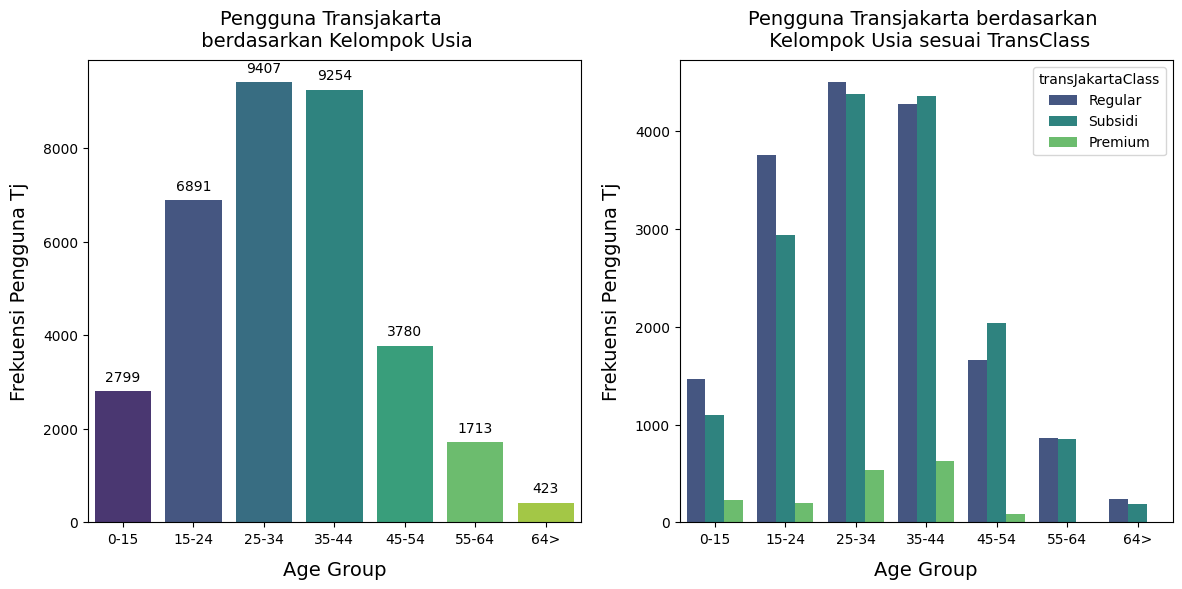

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
ax = sns.barplot(data=df.sort_values('ageGroup'), x='ageGroup', y='payCardID', estimator=len, palette='viridis')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Pengguna Transjakarta \n berdasarkan Kelompok Usia', size=14, pad=10) 
plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)

plt.subplot(1,2,2)
axx = sns.barplot(data=df.sort_values('ageGroup'), x='ageGroup', y='payCardID', estimator=len, hue='transJakartaClass', palette='viridis')
container = ax.containers[0]
plt.title('Pengguna Transjakarta berdasarkan \n Kelompok Usia sesuai TransClass', size=14, pad=10) 
plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)


plt.show()

In [ ]:
# Membuat Persentase berdasarkan kategori Umur
len_age = len(df['ageGroupK'])
list_age = []
for i in age_distribution['count']:
    list_age.append(i*100/len_age)

# Memasukkan ke dalam Dataframe
age_distribution['presentase'] = list_age
age_distribution

,ageGroupK,count,presentase
0,pekerja awal,9407,27.452068
1,paruh baya,9254,27.005574
2,muda,6891,20.109727
3,pra-pensiun,3780,11.031021
4,ana-anak,2799,8.168208
5,pensiun,1713,4.998979
6,usia lanjut,423,1.234424


Dari Data di atas, diketahui bahwa : 
- kategori umur Pekerja Awal (24-34) adalah yang terbanyak dengan 27.3% dari total data
- keteogori umur Paruh Baya (35-44) adalah terbanyak ke-2 dengan 27% dari total data
- kategori umur usia lanjut adalah yang paling sedikit dengan hanya 1.23% data

Bisa disimpulkan bahwa kebanyakan pengguna Transjakarta adalah kelompok usia karyawan dan usia produktif yang menggunakan Transjakarta untuk bekerja.
Seharusnya pebanyak halte dan armada bus di daerah perkantoran untuk mengurangi kepadatan penumpang di Trasjakarta. Untuk lebih detail akan dijelaskan kembali dibawah pada label **Analisis berdasarkan Corridor**

Apakah kelompok Usia berpengaruh terhadap 

**Jenis Kelamin Pengguna Transjakarta**

In [ ]:
# Membuat variabel sex
sex = df.groupby('payCardID')['payCardSex'].value_counts().reset_index()
sex_user = sex['payCardSex'].value_counts().reset_index()
sex_user

,payCardSex,count
0,F,1052
1,M,917


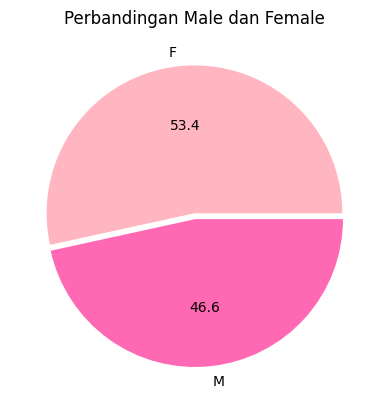

In [ ]:
plt.pie(
    x=sex_user['count'],                    
    labels = sex_user['payCardSex'],            
    autopct = f'%.1f',                    
    explode = [0.02, 0.02],                     
    colors = ['lightpink', 'hotpink']       
)
plt.title('Perbandingan Male dan Female')
plt.show()

Untuk Lebih jelas dibuat Uji statistik untuk mengetahui apakah perbedaan jenis kelamin berpengaruh signifikan terhadap kepadatan pengguna Transjakarta

**One Sample Z-Test**

Menguji apakah proporsi dari suatu kelompok A sama dengan asumsi proporsi teoritis yang diinginkan.

Hipotesis :

- Ho : Proporsi Sex Female = 0.5
- Ha : Proporsi Sex Female != 0.5

Significance level (alpha) = 0.05

In [ ]:
# proporsi buku berdasarkan genre
df['payCardSex'].value_counts() / len(df)

payCardSex
F    0.531532
M    0.468468
Name: count, dtype: float64

In [ ]:
# import library proportions_ztest
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# jumlah female
n_female  = len(df[df['payCardSex']=='F'])
# jumlah keseluruhan Sex (Male and Female)
n_all = len(df['payCardSex'])

display(n_female, n_all)

18214

34267

In [ ]:
stat, pvalue = proportions_ztest(
    count = n_female,           
    nobs = n_all,              
    value = 0.5                
)

pvalue

1.3172319429148897e-31

In [ ]:
# conclusion
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa Proporsi Sex TIDAK sama dengan 0.5
    (Proporsinya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa Proporsi Sex TIDAK sama dengan 0.5
    (Proporsinya berbeda signifikan)
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa Proporsi Sex TIDAK sama dengan 0.5
    (Proporsinya berbeda signifikan)
    


Setelah Di Uji Statistik perbandingan antara Female dan Male berbeda jelas, maka perlu pertimbangan kembali untuk cek per-Armada Transjakarta membutuhkan ruang khusus Wanita atau tidak 

**Jam Sibuk Pengguna Transjakarta**

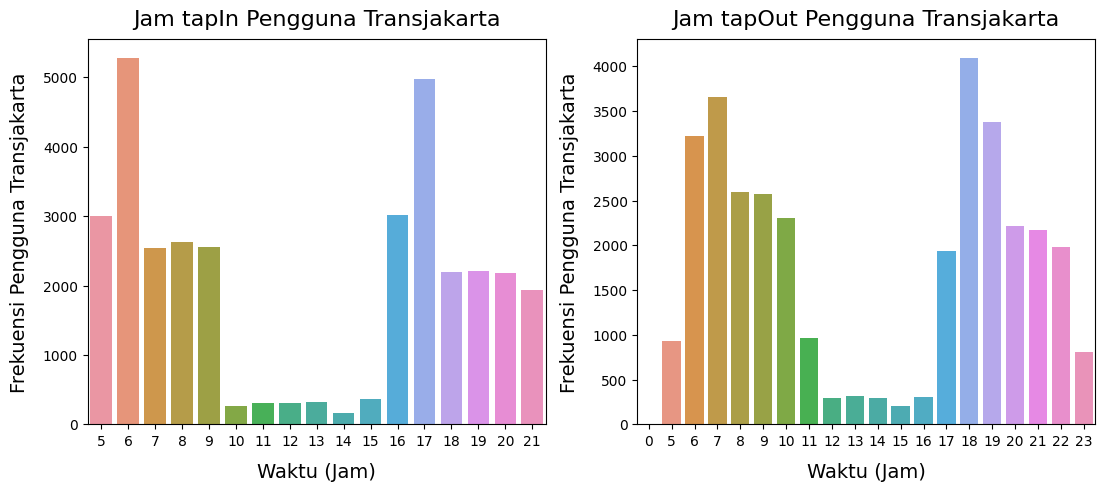

In [ ]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='tapInHour')
plt.title('Jam tapIn Pengguna Transjakarta', size=16, pad=10) 
plt.xlabel('Waktu (Jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Transjakarta', size=14, labelpad = 10)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='tapOutHour')
plt.title('Jam tapOut Pengguna Transjakarta', size=16, pad=10) 
plt.xlabel('Waktu (Jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Transjakarta', size=14, labelpad = 10)

plt.show()

In [ ]:
jam_sibuk = pd.concat([df['tapInHour'], df['tapOutHour']], join='outer').reset_index()
jam_sibuk = jam_sibuk.rename(columns={"index": "pengguna", 0: "HourTime"})

Data di atas merupakan kepadatan halte transjakarta pada saaat pengguna transjakarta tapIn dan tapOut, untuk melihat kepadatan halte ditempat tersebut harus digabungkan keduanya agar dapat terlihat pada jam berapa pengguna transjakarta tersebut memenuhi halte

Text(0, 0.5, 'Frekuensi Pengguna Transjakarta')

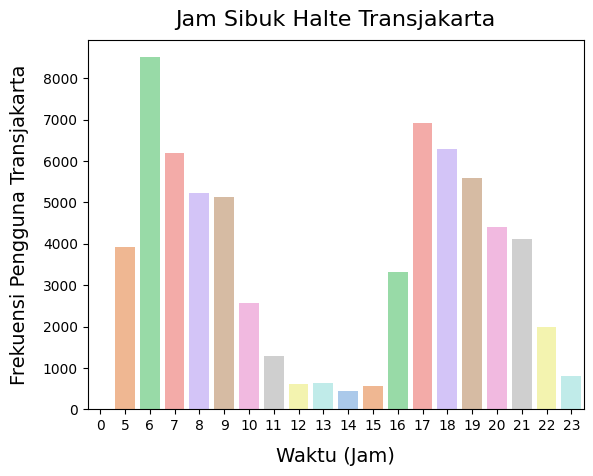

In [ ]:

sns.countplot(data=jam_sibuk, x='HourTime', palette='pastel')
plt.title('Jam Sibuk Halte Transjakarta', size=16, pad=10) 
plt.xlabel('Waktu (Jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Transjakarta', size=14, labelpad = 10)

Dari data braplot di atas dapat dilihat bahwa **Jam sibuk** berada pada jam 6 WIB dan 17 WIB. waktu tersebut merupakan waktu berangkat dan pulang kerja. sesuai informasi di atas bahwa mayoritas pengguna Transjakarta merupakan Kelompok **Usia Pekerja**, sehingga disarankan untuk menambahkan armada di jam sibuk untuk ekfetifitas. untuk lebih jelasnya akan di klasifikasikan dibawah di bagian analisis khusus

**Pembagian Class Transjakarta**

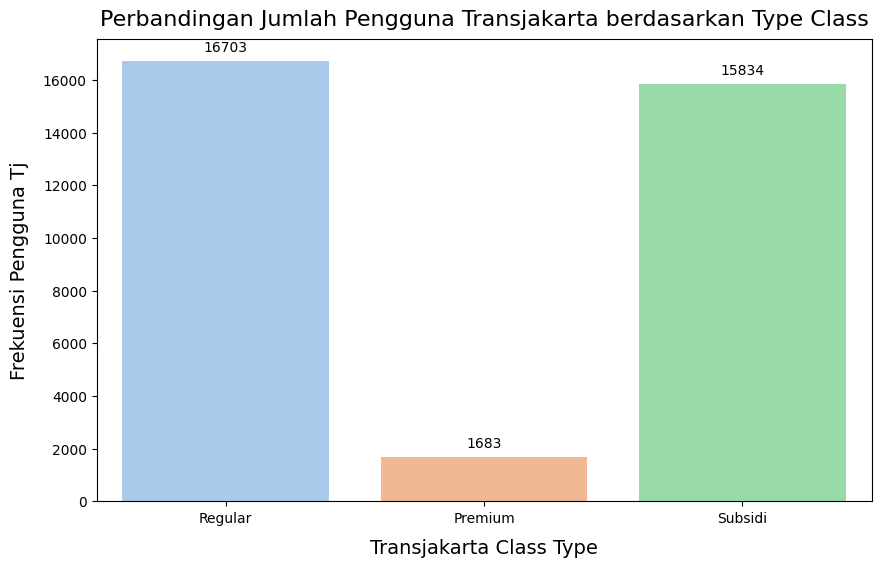

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df, x='transJakartaClass', y='payCardID', estimator=len, palette='pastel')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)

plt.title('Perbandingan Jumlah Pengguna Transjakarta berdasarkan Type Class', size=16, pad=10) 
plt.xlabel('Transjakarta Class Type', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)
plt.show()

In [ ]:
# Membuat persentase transjakarta class
trans_type = df['transJakartaClass'].value_counts().reset_index()
len_transtype = len(df['transJakartaClass'])
list_transtype = []
for i in trans_type['count']:
    list_transtype.append(i*100/len_transtype)

# Memasukkan ke dalam Dataframe
trans_type['presentase'] = list_transtype
trans_type

,transJakartaClass,count,presentase
0,Regular,16750,48.880847
1,Subsidi,15834,46.207722
2,Premium,1683,4.911431


Dari Pembagian di atas akan dijelaskan secara lebih detail pengguna transjakarta paling sedikit yaitu Trans Royal (Premium). dan perbedaan 

**Distribusi Penggunaan Pembayaran Card Bank**

In [ ]:
user_bank = df.groupby('payCardID')['payCardBank'].value_counts().reset_index()
user_bank['payCardBank'].value_counts()


payCardBank
dki       968
emoney    369
flazz     168
brizzi    160
bni       154
online    150
Name: count, dtype: int64

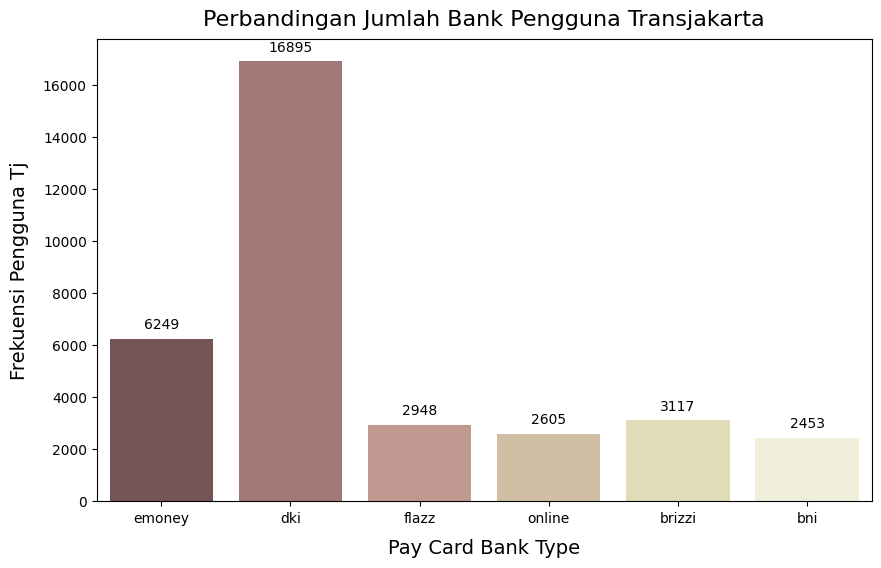

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df, x='payCardBank', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)

plt.title('Perbandingan Jumlah Bank Pengguna Transjakarta', size=16, pad=10) 
plt.xlabel('Pay Card Bank Type', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)
plt.show()

In [ ]:
bank_distribution = df['payCardBank'].value_counts().reset_index()
bank_distribution

,payCardBank,count
0,dki,16895
1,emoney,6249
2,brizzi,3117
3,flazz,2948
4,online,2605
5,bni,2453


In [ ]:
# Membuat Persentase berdasarkan kategori Umur
len_bank = len(df['payCardBank'])
list_bank = []
for i in bank_distribution['count']:
    list_bank.append(i*100/len_bank)

# Memasukkan ke dalam Dataframe
bank_distribution['presentase'] = list_bank
bank_distribution

,payCardBank,count,presentase
0,dki,16895,49.303995
1,emoney,6249,18.236204
2,brizzi,3117,9.096215
3,flazz,2948,8.603029
4,online,2605,7.602066
5,bni,2453,7.158491


- Bank **dki** merupakan bank yang paling banyak digunakan dalam transaksi transportasi Transjakarta. Maka akan dicari lebih detail untuk analisis data pada bank **dki** karena pengguna bank **dki** sebesar 49% dari total data
- **bni** merupakan yang paling sedikit melakukan transaksi di Transjakarta
- Pengguna Transjakarta terbanyak menggunakan bank dki dengan jumah 974 dari 2000 orang.
- Pengguna card bank paling sedikit adalah online dengan hanya 150 cardID saja

### **Corridor dan halte terpadat beserta distribusinya**

In [ ]:
df['tapDay'].unique()

array(['Senin', 'Selasa', 'Rabu', 'kamis', 'Jumat', 'Minggu', 'Sabtu'],
      dtype=object)

In [ ]:
df['tapDay'].value_counts()

tapDay
Jumat     6228
Selasa    6216
Senin     6183
kamis     6178
Rabu      6158
Minggu    1668
Sabtu     1636
Name: count, dtype: int64

weekdays (senin-jumat) jauh lebih padat dibandingkan weekend (sabtu-minggu)

In [ ]:
# membuat tabel baru berisi weekdays dan weekend
def weeks(day):
    if day in ['Senin', 'Selasa', 'Rabu', 'kamis', 'Jumat']:
        return 'weekdays'
    else:
        return 'weekend'

# Menerapkan fungsi untuk membuat kolom 'ageGroup'
df['weekCategory'] = df['tapDay'].apply(weeks)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutTime,payAmount,transJakartaClass,tapInHour,tapOutHour,tapDay,age,ageGroup,ageGroupK,weekCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 06:00:53,3500.0,Regular,5,6,Senin,15,15-24,muda,weekdays
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 06:40:01,3500.0,Regular,5,6,Senin,26,25-34,pekerja awal,weekdays
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 06:50:55,3500.0,Regular,5,6,Senin,31,25-34,pekerja awal,weekdays
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,2023-04-03 06:28:16,3500.0,Regular,5,6,Senin,45,45-54,pra-pensiun,weekdays
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:57:03,3500.0,Regular,6,6,Senin,41,35-44,paruh baya,weekdays


**Corridor terpadat pada weekdays**

In [ ]:
top_corridor = df[df['weekCategory'] == 'weekdays'][['corridorName', 'corridorID']].value_counts().reset_index()
top_corridor.head()

,corridorName,corridorID,count
0,Cibubur - Balai Kota,1T,366
1,Ciputat - CSW,S21,347
2,Kampung Rambutan - Pondok Gede,JAK.06,311
3,Harmoni - Jakarta International Stadium,JIS3,308
4,Pulo Gadung - Monas,2,301


In [ ]:
df_cibubur = df[(df['corridorID']=='1T') & (df['weekCategory'] =='weekdays')]
cibubur_sex = df_cibubur['payCardSex'].value_counts().reset_index()
cibubur_sex

,payCardSex,count
0,M,215
1,F,151


In [ ]:
df_cibubur['payCardBank'].value_counts()

payCardBank
dki       186
emoney    146
brizzi     34
Name: count, dtype: int64

In [ ]:
df_cibubur['ageGroupK'].value_counts()

ageGroupK
pekerja awal    148
paruh baya       73
ana-anak         72
muda             72
pra-pensiun       1
Name: count, dtype: int64

In [ ]:
df_cibubur[df_cibubur['tapDay'] == 'Senin']['tapInHour'].value_counts().head()

tapInHour
17    12
6     10
8      8
21     8
19     8
Name: count, dtype: int64

In [ ]:
df_cibubur['tapInHour'].value_counts().head()

tapInHour
17    62
6     60
9     37
8     34
19    31
Name: count, dtype: int64

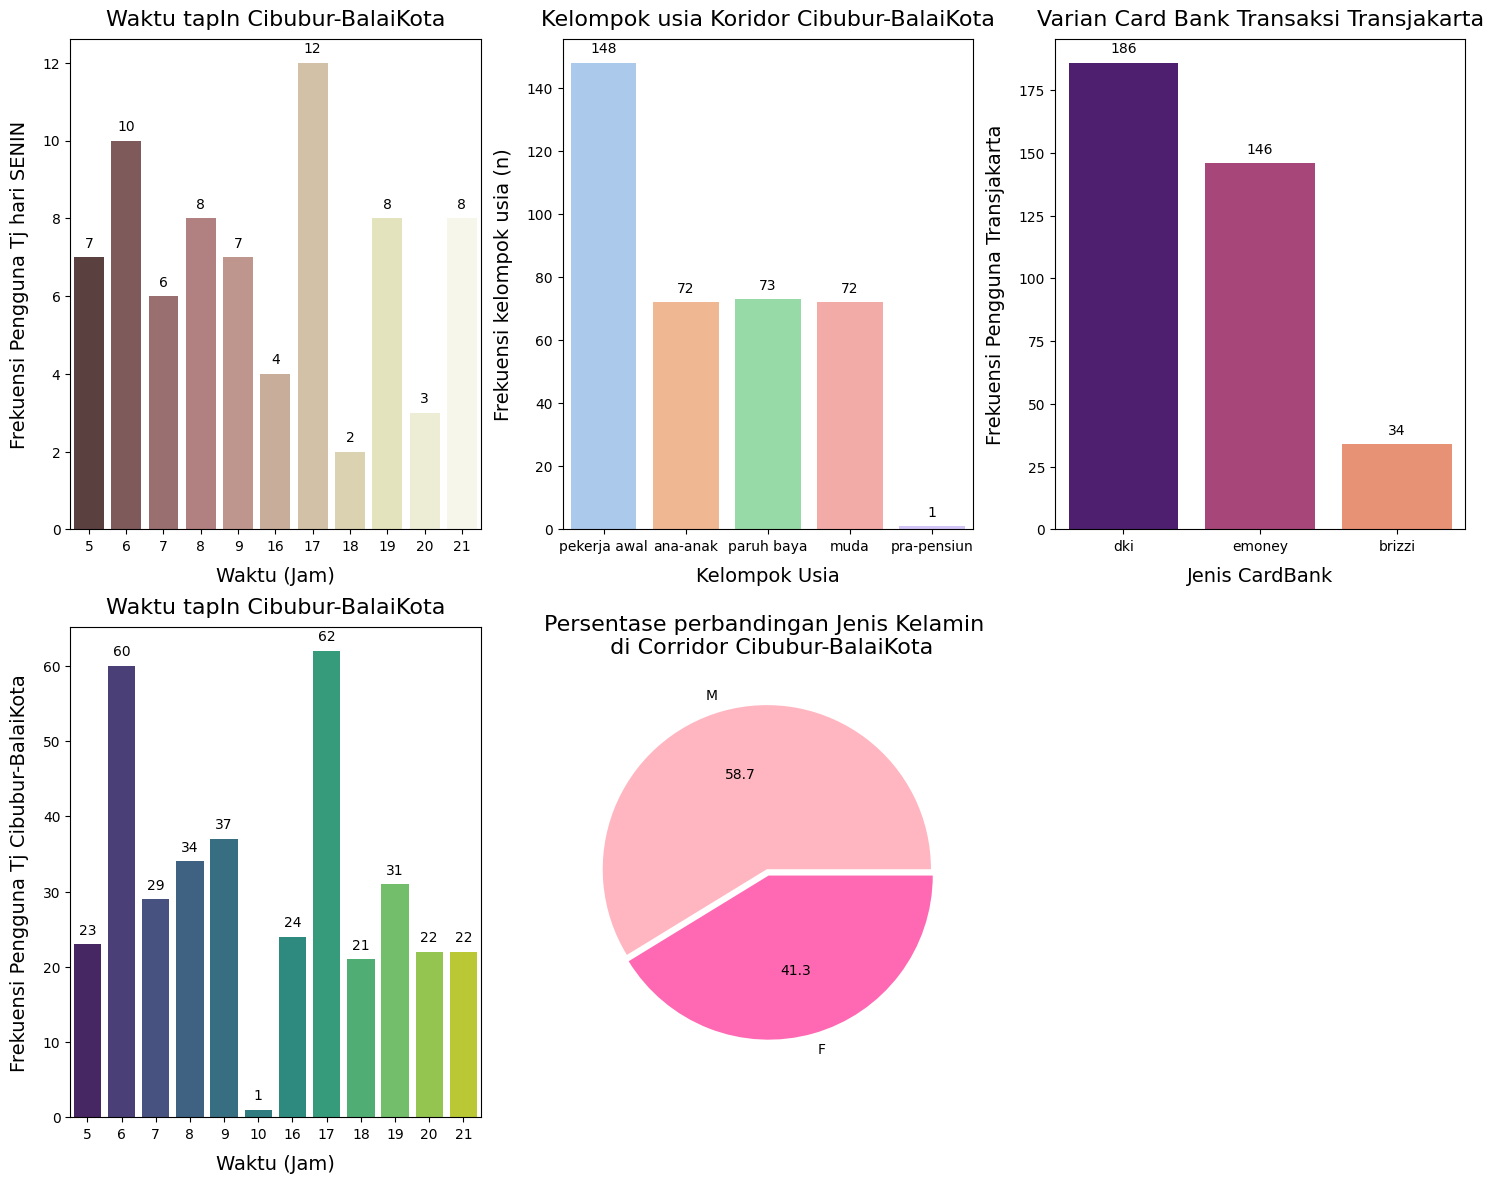

In [ ]:
plt.figure(figsize=(18,14))

plt.subplot(2, 3, 1)
ax = sns.barplot(data=df_cibubur[df_cibubur['tapDay'] == 'Senin'], x='tapInHour', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Waktu tapIn Cibubur-BalaiKota', size=16, pad=10) 
plt.xlabel('Waktu (Jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj hari SENIN', size=14, labelpad = 10)

plt.subplot(2, 3, 2)
ax = sns.barplot(data=df_cibubur, x='ageGroupK', y='payCardID', estimator=len, palette='pastel')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Kelompok usia Koridor Cibubur-BalaiKota', size=16, pad=10) 
plt.xlabel('Kelompok Usia', size=14, labelpad = 10)
plt.ylabel('Frekuensi kelompok usia (n)', size=14, labelpad = 10)

plt.subplot(2, 3, 3)
ax = sns.barplot(data=df_cibubur, x='payCardBank', y='payCardID', estimator=len, palette='magma')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Varian Card Bank Transaksi Transjakarta', size=16, pad=10) 
plt.xlabel('Jenis CardBank', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Transjakarta', size=14, labelpad = 10)

plt.subplot(2, 3, 4)
ax = sns.barplot(data=df_cibubur, x='tapInHour', y='payCardID', estimator=len, palette='viridis')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Waktu tapIn Cibubur-BalaiKota', size=16, pad=10) 
plt.xlabel('Waktu (Jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj Cibubur-BalaiKota', size=14, labelpad = 10)

plt.subplot(2, 3, 5)
plt.pie(
    x= cibubur_sex['count'],                    
    labels = cibubur_sex['payCardSex'],            
    autopct = f'%.1f',                    
    explode = [0.02, 0.02],                     
    colors = ['lightpink', 'hotpink']       
)
plt.title('Persentase perbandingan Jenis Kelamin \n di Corridor Cibubur-BalaiKota', size=16, pad=10) 

plt.show()

In [ ]:
cibubur_location = pd.DataFrame(data=df_cibubur[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']]['tapInStopsName'].unique())
cibubur_location['Lon'] = df_cibubur['tapInStopsLon'].unique()
cibubur_location['Lat'] = df_cibubur['tapInStopsLat'].unique()
cibubur_location.head()

,0,Lon,Lat
0,Benhil 3,106.81632,-6.216010
1,Balai Kota 1,106.82847,-6.180598
2,Dukuh Atas 3,106.82250,-6.205650
3,Tosari 1,106.82334,-6.199166
4,Cibubur Junction,106.89366,-6.368735


In [ ]:
jakarta_map = folium.Map(
    location = [-6.200000, 	106.816666],
    zoom_start = 14
)

for i in range(len(cibubur_location)):
    lat = cibubur_location.loc[i, 'Lat']
    long = cibubur_location.loc[i, 'Lon']
    name = cibubur_location.loc[i, 0]   
    
    cibubur_corridor = folium.Marker(
        location=[lat, long],
        tooltip=f'Lokasi {name}',
        icon=folium.Icon(
            color='red',
            icon='bus',
            prefix='fa'
        )
    )

    cibubur_corridor.add_to(jakarta_map)
    
jakarta_map

**Insight**

Data corridor terdapat ada pada **corridor cibubur - balai kota**, diketahui corridor tersebut merupakan corridor terpadat dan dari visualisasi di atas dapat disimpulkan bahwa
- analisis dilakukan pada corridor terpadat tersebut dengan melihat sebaran jenis kelamin, dapat disimpulkan bahwa pengguna Tj Male lebih banyak dibanding Female untuk **corridor cibubur - balai kota**.
- dapat diketahui juga jika Hari terseibuk secara umum di koridor tersebut adalah hari **Senin** dan waktu paling padat di corridor tersebut baik pada hari **senin** maupun waktu weekdays adalah jam 17 WIB waktu pulang kantor dan jam 6 WIB waktu berangkat kantor. karena data yg di analisis khusus weekdays untuk mengetahui jam sibuk kantor tersebut apakah armada transjakarta memerlukan fasilitas tambahan untuk meningkatkan kenyamanan. Karena pada transportasi **corridor cibubur - balai kota** merupakan Class Premium (Royal Trans) yang sebaiknya dipertimbangkan untuk dikembangkan.
- Karena padatnya pada saat jam kantor dapat dilihat bahwa pengguna Transjakarta di koridor tersebut juga dipenuhi oleh kelompok **umur pekerja awal (25-34)** dengan 148 orang
- Pengguna mayoritas di corridor tersebut juga sama seperti gambaran umum lebih banyak pengguna **bank dki** dibandingkan bank lain untuk transaksi

In [ ]:
top_corridorl = df[df['weekCategory'] == 'weekend'][['corridorName', 'corridorID']].value_counts().reset_index()
top_corridorl.head()

,corridorName,corridorID,count
0,Kalideres - Bundaran HI via Veteran,M3,35
1,Pinang Ranti - Bundaran Senayan,9C,30
2,Matraman Baru - Ancol,5,29
3,Pinang Ranti - Kampung Rambutan,JAK.19,29
4,Pinang Ranti - Pluit,9,28


In [ ]:
df_kalideres = df[(df['corridorID']=='M3') & (df['weekCategory'] =='weekend')]
kalideres_sex = df_kalideres['payCardSex'].value_counts().reset_index()
kalideres_sex

,payCardSex,count
0,M,22
1,F,13


In [ ]:
df_kalideres['payCardBank'].value_counts()

payCardBank
dki       21
flazz      6
bni        5
online     2
brizzi     1
Name: count, dtype: int64

In [ ]:
df_kalideres['ageGroupK'].value_counts()

ageGroupK
paruh baya      8
pekerja awal    8
ana-anak        7
pra-pensiun     5
muda            3
pensiun         2
usia lanjut     2
Name: count, dtype: int64

In [ ]:
df_kalideres['tapInHour'].value_counts().head()

tapInHour
17    4
12    4
7     4
8     3
18    3
Name: count, dtype: int64

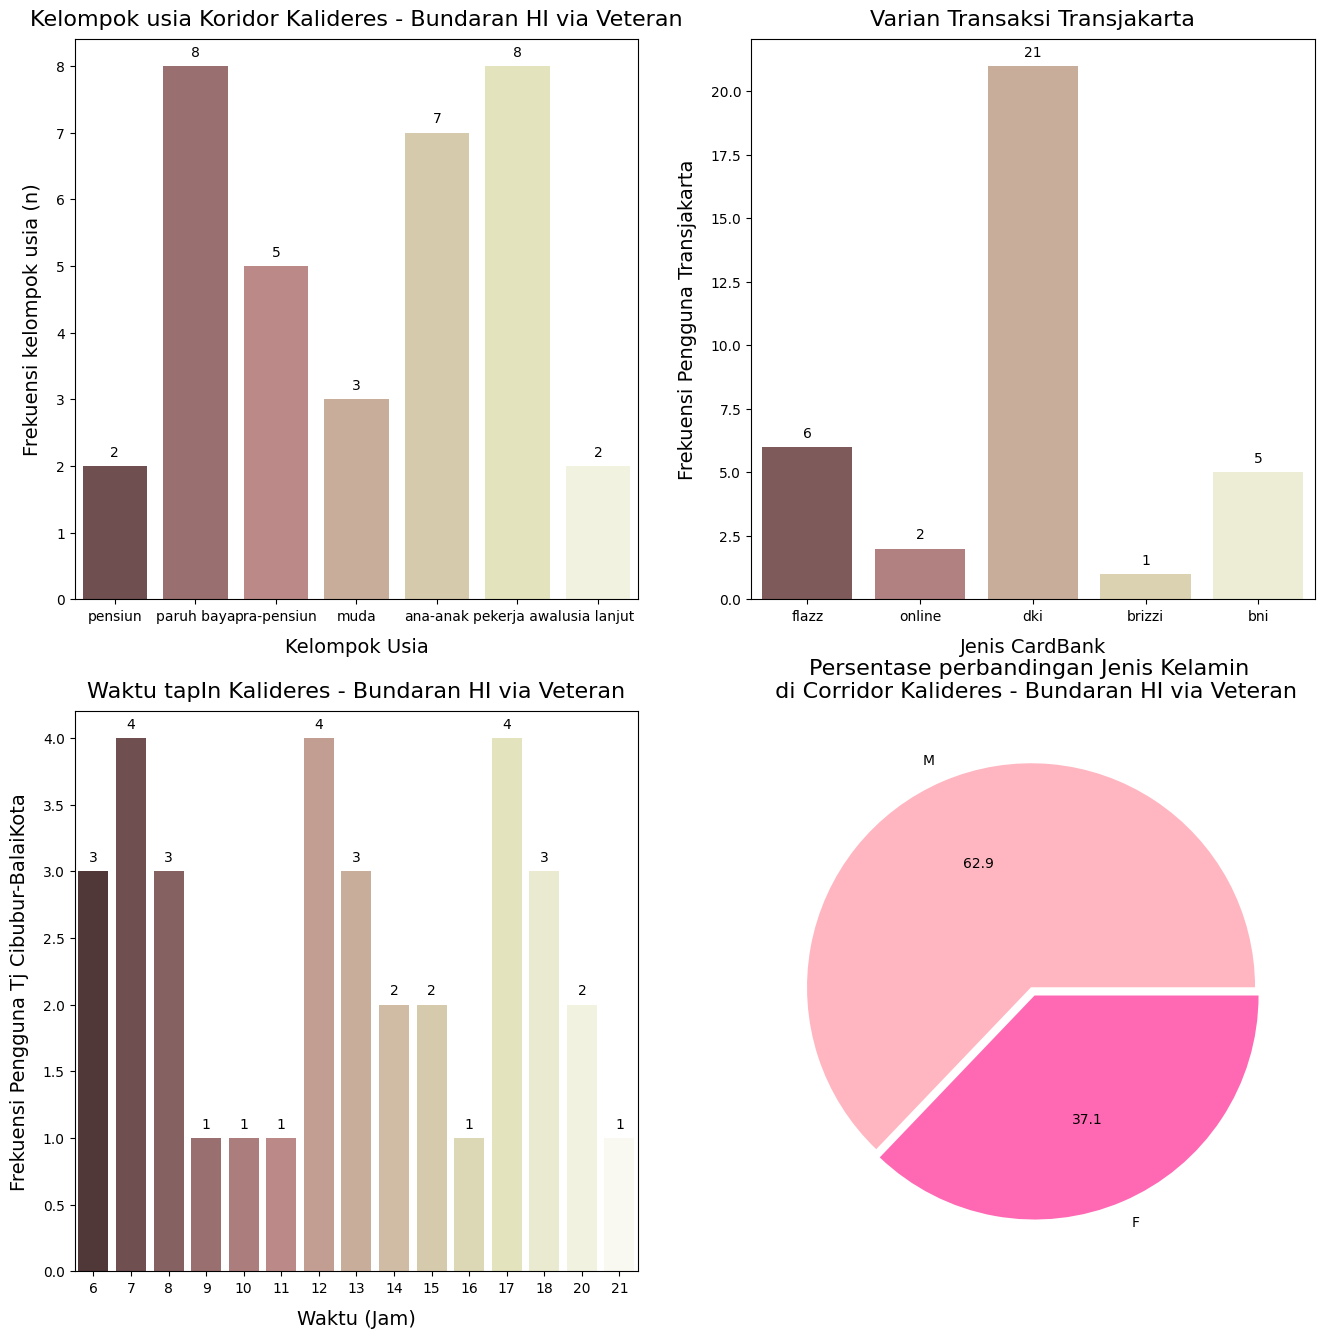

In [ ]:
plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
ax = sns.barplot(data=df_kalideres, x='ageGroupK', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Kelompok usia Koridor Kalideres - Bundaran HI via Veteran', size=16, pad=10) 
plt.xlabel('Kelompok Usia', size=14, labelpad = 10)
plt.ylabel('Frekuensi kelompok usia (n)', size=14, labelpad = 10)

plt.subplot(2, 2, 2)
ax = sns.barplot(data=df_kalideres, x='payCardBank', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Varian Transaksi Transjakarta', size=16, pad=10) 
plt.xlabel('Jenis CardBank', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Transjakarta', size=14, labelpad = 10)

plt.subplot(2, 2, 3)
ax = sns.barplot(data=df_kalideres, x='tapInHour', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Waktu tapIn Kalideres - Bundaran HI via Veteran', size=16, pad=10) 
plt.xlabel('Waktu (Jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj Cibubur-BalaiKota', size=14, labelpad = 10)

plt.subplot(2, 2, 4)
plt.pie(
    x= kalideres_sex['count'],                    
    labels = kalideres_sex['payCardSex'],            
    autopct = f'%.1f',                    
    explode = [0.02, 0.02],                     
    colors = ['lightpink', 'hotpink']       
)
plt.title('Persentase perbandingan Jenis Kelamin \n di Corridor Kalideres - Bundaran HI via Veteran', size=16, pad=10) 

plt.show()

In [ ]:
kalideres_location = pd.DataFrame(data=df_kalideres[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']]['tapInStopsName'].unique())
kalideres_location['Lon'] = df_kalideres['tapInStopsLon'].unique()
kalideres_location['Lat'] = df_kalideres['tapInStopsLat'].unique()
kalideres_location.head()

,0,Lon,Lat
0,Jelambar,106.78651,-6.166548
1,Bundaran HI,106.82300,-6.193021
2,Kalideres,106.70550,-6.154412
3,Taman Kota,106.75789,-6.157176
4,Grogol 1,106.78971,-6.166824


In [ ]:
jakarta_map = folium.Map(
    location = [-6.200000, 	106.816666],
    zoom_start = 14
)

for i in range(len(kalideres_location)):
    lat = kalideres_location.loc[i, 'Lat']
    long = kalideres_location.loc[i, 'Lon']
    name = kalideres_location.loc[i, 0]   
    
    kalideres_corridor = folium.Marker(
        location=[lat, long],
        tooltip=f'Lokasi {name}',
        icon=folium.Icon(
            color='red',
            icon='bus',
            prefix='fa'
        )
    )

    kalideres_corridor.add_to(jakarta_map)
    
jakarta_map

**Insight**

Data corridor terdapat ada pada **corridor Kalideres - Bundaran HI via Veteran**, diketahui corridor tersebut merupakan corridor terpadat dan dari visualisasi di atas dapat disimpulkan bahwa
- analisis dilakukan pada corridor terpadat tersebut dengan melihat sebaran jenis kelamin, dapat disimpulkan bahwa pengguna Tj Male lebih banyak dibanding Female untuk **corridor Kalideres - Bundaran HI via Veteran**.
- dapat diketahui juga jika Hari terseibuk secara umum di koridor tersebut adalah hari **Minggu** dan waktu paling padat di corridor tersebut waktu weekend adalah jam 17 WIB, jam 12 WIB, dan jam 7 WIB. karena data di analisis khusus weekend ini untuk mengetahui apakah pada saat weekend penurunan prngguna transportasi transjakarta sehingga bisa menyeusaikan armada yanng dikerahkan pada saat weekend akibat banyaknya orang jakarta yang berlibur ke luar kota . Transportasi pada **corridor  Kalideres - Bundaran HI via Veteran** merupakan Class Reguler.
- Dapat dilihat bahwa pengguna Transjakarta di koridor tersebut juga dipenuhi oleh kelompok **umur pekerja awal (25-34)** dengan 8 orang dan **paruh baya (35-44)** sebanyak 8 orang.
- Pengguna mayoritas di corridor tersebut juga sama seperti gambaran umum lebih banyak pengguna **bank dki** dibandingkan bank lain untuk transaksi

**Analisis Halte Terpadat pada saat weekdays dan weekend**

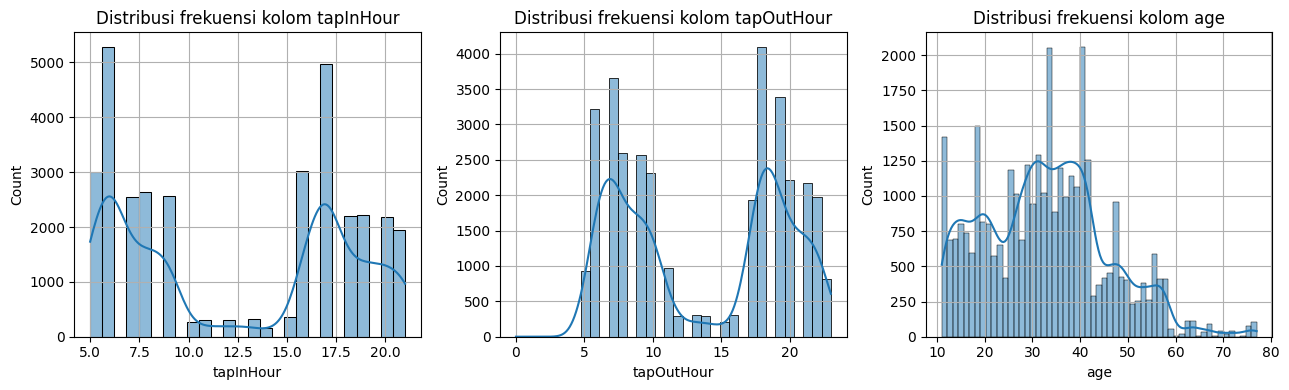

In [ ]:
# Melihat sebaran data atau outliers
columns = ['tapInHour', 'tapOutHour', 'age']

plt.figure(figsize=(13, 4))
for i, column in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=df[column], kde=True)
    plt.title(f'Distribusi frekuensi kolom {column}')
    plt.grid()

plt.tight_layout()
plt.show()

Seluruh data yag di analisis di atas terdistribusi tidak normal, untuk memperjelas argumen dilakukan uji statistik menggunakan **normaltest** (D'Agustino & Pearson)

In [ ]:
# Uji Normalitas
from scipy.stats import normaltest

kolom_uji = ['tapInHour','tapOutHour','age']

list = []

for i in kolom_uji : 
    stat , pvalue = normaltest(df[i])
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), 'terdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'TIDAK terdistribusi normal'])

print('Hasil Uji Normalitas')
tabelnormalitas = pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])
display(tabelnormalitas)

print('Jika p-value < 0,05 kita mengasumsikan bahwa data TIDAK terdistribusi normal')
print('Jika p-value > 0,05 kita mengasumsikan data terdistribusi normal')


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,tapInHour,0.0,TIDAK terdistribusi normal
1,tapOutHour,0.0,TIDAK terdistribusi normal
2,age,0.0,TIDAK terdistribusi normal


Jika p-value < 0,05 kita mengasumsikan bahwa data TIDAK terdistribusi normal
Jika p-value > 0,05 kita mengasumsikan data terdistribusi normal


In [ ]:
# Menggabungkan tapIn dan tapOut untuk megetahui kepadatan Halte secara menyeluruh
tapIn = df[df['weekCategory'] == 'weekdays']['tapInStopsName']
tapOut = df[df['weekCategory'] == 'weekdays']['tapOutStopsName']

In [ ]:
halte_tap = pd.concat([tapIn, tapOut]).reset_index()
halte_tap = halte_tap.rename(columns={"index": "count", 0: "Halte"})
halte_tap['Halte'].value_counts().reset_index().head(5)

,Halte,count
0,Penjaringan,449
1,BKN,428
2,BNN LRT,227
3,Rusun Kapuk Muara,222
4,Cibubur Junction,220


In [ ]:
df[df['tapInStopsName'] == 'Penjaringan']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutTime,payAmount,transJakartaClass,tapInHour,tapOutHour,tapDay,age,ageGroup,ageGroupK,weekCategory
66,TFRA396G6W78PD,3569562588766630,dki,"dr. Sakura Budiman, S.IP",M,1972,3C,Rusun Kapuk Muara - Penjaringan,1.0,P00170,...,2023-04-03 07:11:37,0.0,Subsidi,6,7,Senin,51,45-54,pra-pensiun,weekdays
453,ACPK576Y9I41XE,4203562511038947968,brizzi,drg. Tantri Situmorang,F,1983,12,Tanjung Priok - Pluit,0.0,P00170,...,2023-04-03 19:43:28,3500.0,Regular,17,19,Senin,40,35-44,paruh baya,weekdays
560,IAWA770P0I70HE,2245958200404051,dki,Tgk. Hamzah Hutagalung,M,1986,3C,Rusun Kapuk Muara - Penjaringan,1.0,P00170,...,2023-04-03 18:34:50,0.0,Subsidi,17,18,Senin,37,35-44,paruh baya,weekdays
666,IXCH189K2P84LT,3569562588766630,dki,"dr. Sakura Budiman, S.IP",M,1972,3C,Rusun Kapuk Muara - Penjaringan,1.0,P00170,...,2023-04-04 06:33:57,0.0,Subsidi,6,6,Selasa,51,45-54,pra-pensiun,weekdays
1053,LKKR237F4V31KP,4203562511038947968,brizzi,drg. Tantri Situmorang,F,1983,12,Tanjung Priok - Pluit,0.0,P00170,...,2023-04-04 17:53:38,3500.0,Regular,16,17,Selasa,40,35-44,paruh baya,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36527,BUYV688J4H85HK,3521643682976940,dki,Rahmi Saptono,F,2012,9,Pinang Ranti - Pluit,0.0,P00170,...,2023-04-17 14:31:24,3500.0,Regular,13,14,Senin,11,0-15,ana-anak,weekdays
36889,SCYU796J4E73WZ,2294272245944067,dki,"Tgk. Usyi Sirait, S.Gz",F,2001,12H,Rusun Penjaringan - Penjaringan,1.0,P00170,...,2023-04-18 11:14:40,3500.0,Regular,10,11,Selasa,22,15-24,muda,weekdays
36927,TTMA821B0K61ZY,3521643682976940,dki,Rahmi Saptono,F,2012,9,Pinang Ranti - Pluit,0.0,P00170,...,2023-04-18 10:39:31,3500.0,Regular,9,10,Selasa,11,0-15,ana-anak,weekdays
37289,YSXQ926Z1V33FF,2294272245944067,dki,"Tgk. Usyi Sirait, S.Gz",F,2001,12H,Rusun Penjaringan - Penjaringan,1.0,P00170,...,2023-04-19 12:30:08,3500.0,Regular,12,12,Rabu,22,15-24,muda,weekdays


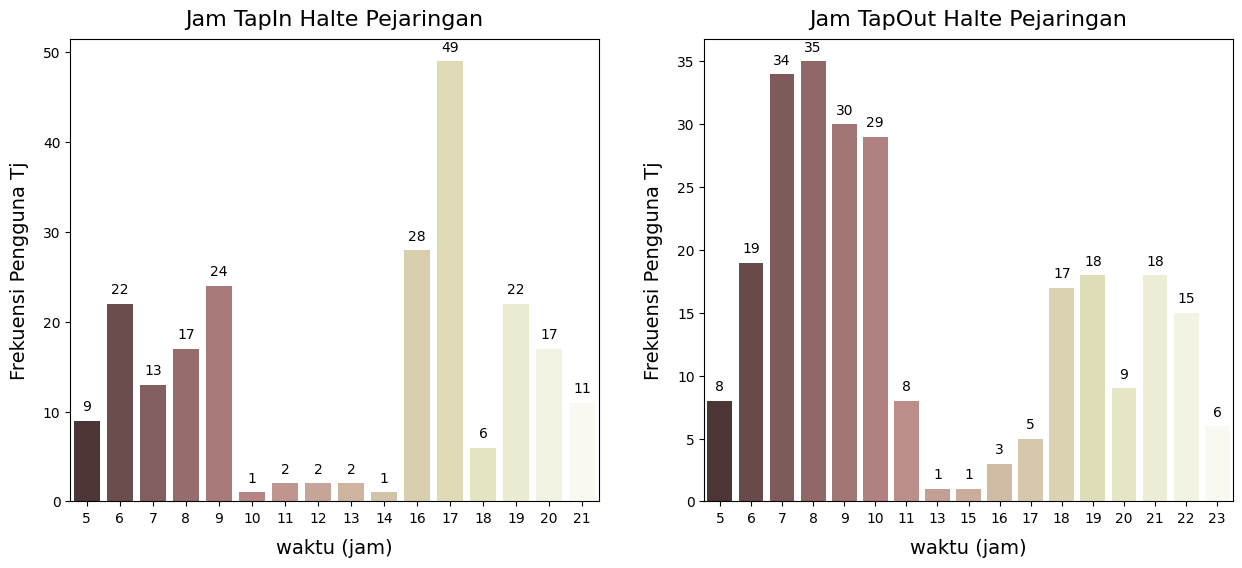

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax = sns.barplot(data=df[df['tapInStopsName'] == 'Penjaringan'], x='tapInHour', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Jam TapIn Halte Pejaringan', size=16, pad=10) 
plt.xlabel('waktu (jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)

plt.subplot(1,2,2)
ax = sns.barplot(data=df[df['tapOutStopsName'] == 'Penjaringan'], x='tapOutHour', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Jam TapOut Halte Pejaringan', size=16, pad=10) 
plt.xlabel('waktu (jam)', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)

plt.show()

In [ ]:
# Menggabungkan tapIn dan tapOut untuk megetahui kepadatan Halte secara menyeluruh
tapInEnd = df[df['weekCategory'] == 'weekend']['tapInStopsName']
tapOutEnd = df[df['weekCategory'] == 'weekend']['tapOutStopsName']

In [ ]:
halte_tapEnd = pd.concat([tapInEnd, tapOutEnd]).reset_index()
halte_tapEnd = halte_tapEnd.rename(columns={"index": "count", 0: "Halte"})
halte_tapEnd['Halte'].value_counts().reset_index().head(5)

,Halte,count
0,Penjaringan,33
1,Jelambar,27
2,Bundaran Senayan,25
3,Gelora Bung Karno,25
4,Cibubur Junction,24


In [ ]:
df[df['weekCategory'] == 'weekend']['tapInStopsName'].value_counts().reset_index()

,tapInStopsName,count
0,Gelora Bung Karno,16
1,BNN LRT,13
2,Penjaringan,12
3,Buperta Cibubur,12
4,Jelambar,12
...,...,...
1794,Mandara Permai 5,1
1795,Masjid Hidayatussalam,1
1796,Bintaro Kodam,1
1797,Sbr. SKKT Pondok Bambu,1


### **payCardBank terbanyak**

Berdasarkan gambaran umum di atas bank yang paling banyak digunakan adalah bank **dki**

In [ ]:
# Membuat Persentase berdasarkan kategori Umur
len_bank = len(df['payCardBank'])
list_bank = []
for i in bank_distribution['count']:
    list_bank.append(i*100/len_bank)

# Memasukkan ke dalam Dataframe
bank_distribution['presentase'] = list_bank
bank_distribution

,payCardBank,count,presentase
0,dki,16895,49.371712
1,emoney,6249,18.261251
2,brizzi,3117,9.108708
3,flazz,2948,8.614845
4,online,2605,7.612507
5,bni,2453,7.168323


**Persebaran Banyaknya orang menggunakan bankDKI dengan payCardID**

In [ ]:
df_akun_bank = df.groupby('payCardID')[['payCardBank', 'age', 'ageGroup', 'ageGroupK', 'payCardSex']].value_counts().reset_index().rename(columns={'count':'TotalTransaction'})
df_akun_bank

,payCardID,payCardBank,age,ageGroup,ageGroupK,payCardSex,TotalTransaction
0,60403675436,flazz,34,25-34,pekerja awal,F,35
1,60404498697,flazz,34,25-34,pekerja awal,M,37
2,60417020934,flazz,58,55-64,pensiun,F,4
3,60421208343,flazz,20,15-24,muda,M,4
4,60427539402,flazz,40,35-44,paruh baya,F,1
...,...,...,...,...,...,...,...
1964,4980316891349967240,brizzi,29,25-34,pekerja awal,M,3
1965,4980564692107508708,brizzi,15,15-24,muda,M,13
1966,4986663118222525457,brizzi,13,0-15,ana-anak,F,38
1967,4995586292967989635,brizzi,30,25-34,pekerja awal,M,3


In [ ]:
df_uji_bank = df.groupby('payCardID')['payCardBank'].value_counts().reset_index().rename(columns={'count':'TotalTransaction'})
df_uji_bank = df_uji_bank['payCardBank'].value_counts().reset_index()
df_uji_bank

,payCardBank,count
0,dki,968
1,emoney,369
2,flazz,168
3,brizzi,160
4,bni,154
5,online,150


Text(0, 0.5, 'Banyaknya Pengguna')

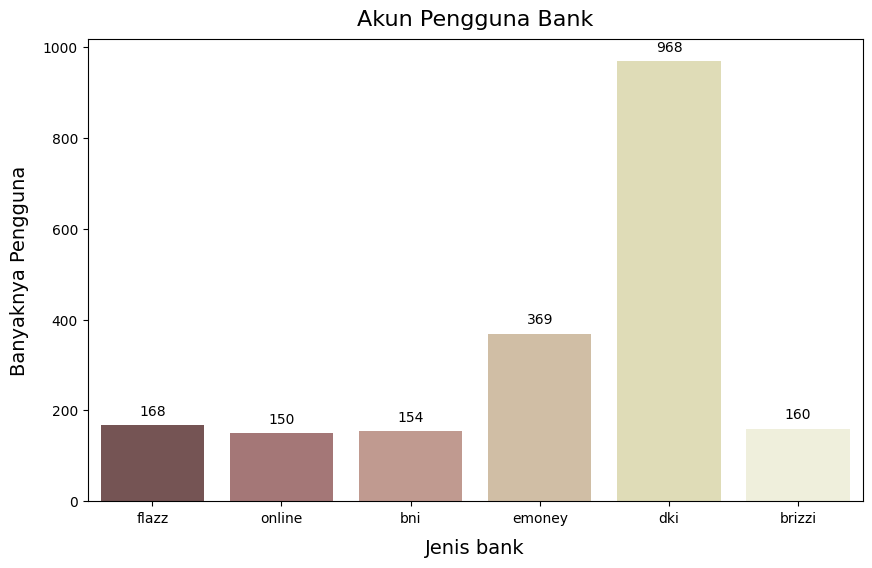

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_akun_bank, x='payCardBank', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Akun Pengguna Bank', size=16, pad=10) 
plt.xlabel('Jenis bank', size=14, labelpad = 10)
plt.ylabel('Banyaknya Pengguna', size=14, labelpad = 10)


dari data di atas diketahui ada sekitar 968 orang menggunakan bank **dki** merupakan jumlah terbanyak dan 150 orang melakukan pembayaran secara **online** paling sedikit. Untuk meningkatkan layanan dan membuat keuntungan untuk Transjakarta lebih baik merekomendasikan bank DKI membuat iklan 

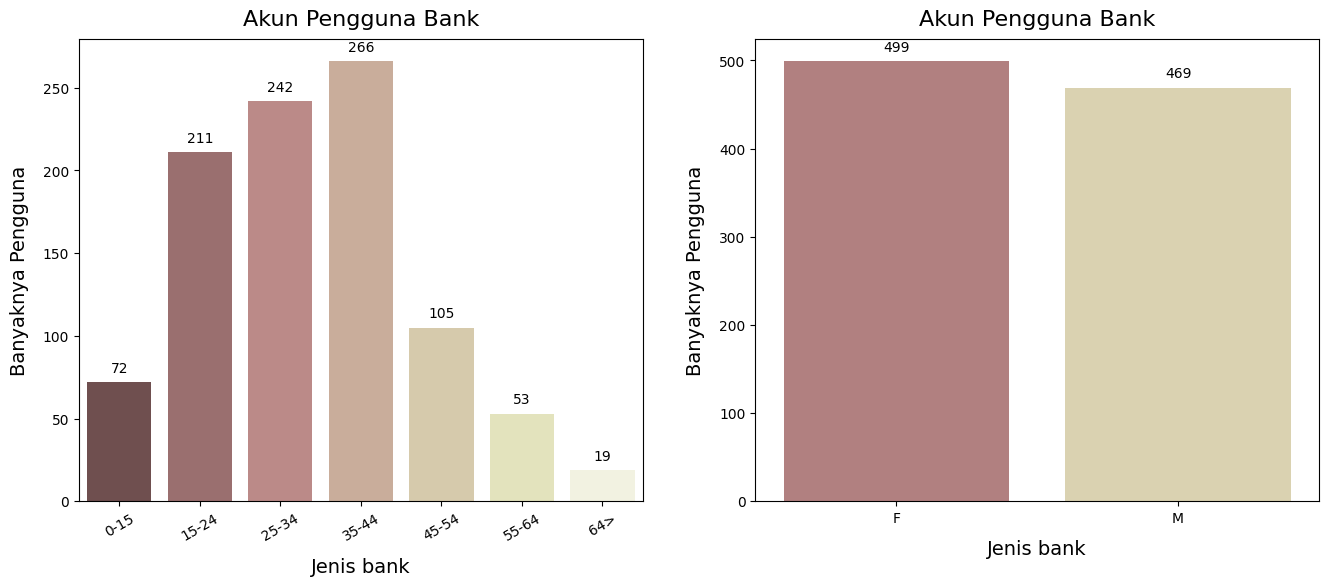

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.barplot(data=df_akun_bank[df_akun_bank['payCardBank'] == 'dki'].sort_values('ageGroup', ascending=True), x='ageGroup', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Akun Pengguna Bank', size=16, pad=10) 
plt.xlabel('Jenis bank', size=14, labelpad = 10)
plt.ylabel('Banyaknya Pengguna', size=14, labelpad = 10)
plt.xticks(rotation=30)


plt.subplot(1,2,2)
ax = sns.barplot(data=df_akun_bank[df_akun_bank['payCardBank'] == 'dki'], x='payCardSex', y='payCardID', estimator=len, palette='pink')
container = ax.containers[0]
ax.bar_label(container, [int(x) for x in container.datavalues], padding= 5)
plt.title('Akun Pengguna Bank', size=16, pad=10) 
plt.xlabel('Jenis bank', size=14, labelpad = 10)
plt.ylabel('Banyaknya Pengguna', size=14, labelpad = 10)
plt.show()

- Berdasarkan darigrafik diatas bisa kit lihat bahwa pengguna kartu di setiap halte adalah pengguna dengan kartu bank DKI sebanyak 1289 orang. dimana porporsi pengguna karu bank DKI usia terbanyak ada pada kelompok usia 35-44 tahun sebanyak 266 orang, rentan usia 25-34 tahun sebanyak 242 orang dan 211 orang berusia 211 orang. pengguna paling sedikit ada pada kelompok usia 64 keatas. 

- Dari rentan usuia tersebut, nampaknya proporsi jenis kelamin tidak terlalu berbeda signifikan perbedaran jenis kelamin laki-laki berada jauh lebih banyak sebesar 499 dibandingkan jenis kelamin wanita sebesar 469.

- dilihat Dari perabaran data yang terjadi nampaknya penggunaan kartu memiliki perbedaan yang tidak signifikan. untuk memvalidasi hal tersebut maka kita akan melakukan uji statistik untuk penggunaan kartu.

- Ho : Semua median penggunaan kartu tidak berbeda signifikan.
- Ha : Ada salah satu penggunaan kartu yang berbeda, tetapi kita tidak tahu yang mana.

In [ ]:
from scipy.stats import kruskal

In [ ]:
stat, pvalue = kruskal(
    df_uji_bank[df_uji_bank['payCardBank']=='dki']['count'],
    df_uji_bank[df_uji_bank['payCardBank']=='emoney']['count'],
    df_uji_bank[df_uji_bank['payCardBank']=='flazz']['count'],
    df_uji_bank[df_uji_bank['payCardBank']=='brizzi']['count'],
    df_uji_bank[df_uji_bank['payCardBank']=='bni']['count'],
    df_uji_bank[df_uji_bank['payCardBank']=='online']['count']
)

pvalue

0.41588018699550794

In [ ]:
# conclusion
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok yang berbeda. Tetapi kita tidak tahu yang mana.
    (TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok yang berbeda. Tetapi kita tidak tahu yang mana.
    (berbeda signifikan)
    ''')


    pvalue = 0.41588. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok yang berbeda. Tetapi kita tidak tahu yang mana.
    (TIDAK berbeda signifikan)
    


**Identifikasi payAmount dengan klasifikasi berdasarkan variabel tertentu**

In [ ]:
df_payAmount = df.groupby('payAmount')[['payCardBank', 'transJakartaClass']].value_counts().reset_index()
df_payAmount

,payAmount,payCardBank,transJakartaClass,count
0,0.0,dki,Subsidi,8238
1,0.0,emoney,Subsidi,2684
2,0.0,online,Subsidi,1363
3,0.0,brizzi,Subsidi,1306
4,0.0,flazz,Subsidi,1159
5,0.0,bni,Subsidi,1084
6,3500.0,dki,Regular,7959
7,3500.0,emoney,Regular,3164
8,3500.0,flazz,Regular,1670
9,3500.0,brizzi,Regular,1522


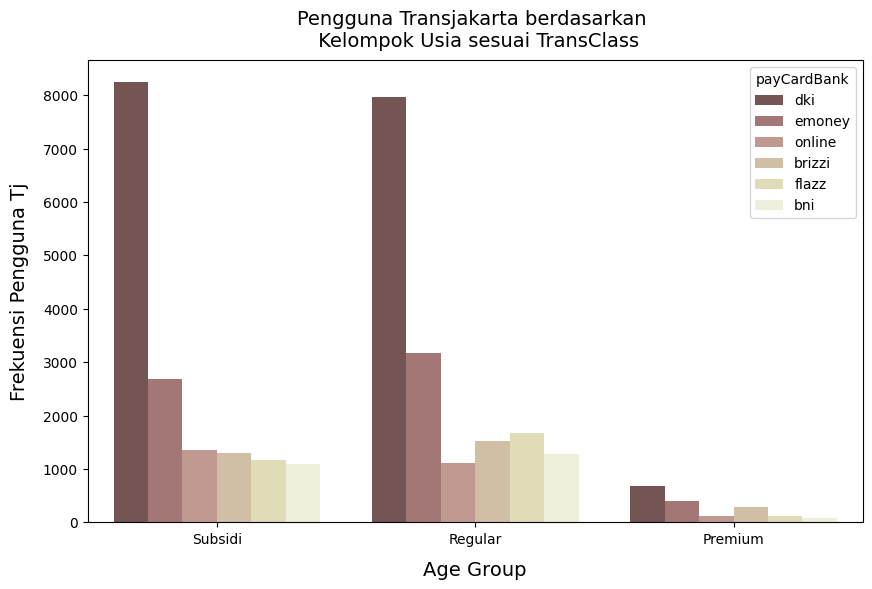

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_payAmount, x='transJakartaClass', y='count', estimator=sum, hue='payCardBank', palette='pink', ci=0)
container = ax.containers[0]
plt.title('Pengguna Transjakarta berdasarkan \n Kelompok Usia sesuai TransClass', size=14, pad=10) 
plt.xlabel('Age Group', size=14, labelpad = 10)
plt.ylabel('Frekuensi Pengguna Tj', size=14, labelpad = 10)


plt.show()

Untuk Kelas **Premium** total transaksi terbanyak menggunakan bank DKI dan paling sedikit transaksi menggunakan online

In [ ]:
df_payAmount_age = df.groupby('transJakartaClass')[['payCardBank', 'ageGroup']].value_counts().reset_index()
df_payAmount_age[(df_payAmount_age['transJakartaClass'] == 'Premium') & (df_payAmount_age['payCardBank'] == 'dki')]

,transJakartaClass,payCardBank,ageGroup,count
0,Premium,dki,25-34,261
1,Premium,dki,35-44,256
8,Premium,dki,15-24,77
11,Premium,dki,45-54,42
13,Premium,dki,0-15,40
24,Premium,dki,64>,2
25,Premium,dki,55-64,2


Dilihat dari tabel diatas untuk Kelas Royal Trans (premium) paling banyak menggunakan bank **dki** dengan rentang usia 25-34 (Usia pekerja awal) sebanyak 261 transaksi dan rentang usia 35-44 (paruh baya) sebanyak 256 transaksi. Dapat dilihat juga bahwa yang paling sedikit adalah kelompok umur di atas 64 tahun dan 55-64 tahun sebanyak 2 transaksi. Maka untuk meningkatkan pelayanan sebaiknya bank DKI dan transjakarta bekerja sama dan merekomendasikan kepada bank DKI untuk memasang iklan di halte ataupun di corridor untuk meningkatkan keuntungan di sisi Transjakarta maupun bank DKI

In [ ]:
df_payAmount_age[(df_payAmount_age['transJakartaClass'] == 'Premium') & (df_payAmount_age['payCardBank'] == 'online')]

,transJakartaClass,payCardBank,ageGroup,count
9,Premium,online,0-15,77
14,Premium,online,45-54,39
20,Premium,online,35-44,2
21,Premium,online,25-34,2
22,Premium,online,15-24,2


Dilihat dari tabel diatas untuk Kelas Royal Trans (premium) paling sedikit melakukan pembayaran **online**. dengan pembayaran **online** terbnayak dengan rentang usia 0-15 tahun (anak-anak) sebanyak 77 transaksi. Kemungkinan hal ini terjadi karena anak-anak belum diperbolehkan memiliki kartu bank pribadi. Dapat dilihat juga bahwa yang paling sedikit adalah kelompok umur yang biasanya menjadi pengguna terbanyak Transjakarta, Peningkatan layanan online harus diperhatikan karena mayoritas belum menggunakan sistem online disebabkan lambatnya sistem dan buruknya integrasi sehingga pengguna rutin transjakarta memilih menggunakan bank **dki** .

Untuk Kelas **Regular** total transaksi terbanyak menggunakan bank DKI dan paling sedikit transaksi menggunakan online

In [ ]:
df_payAmount_age[(df_payAmount_age['transJakartaClass'] == 'Regular') & (df_payAmount_age['payCardBank'] == 'dki')]

,transJakartaClass,payCardBank,ageGroup,count
32,Regular,dki,25-34,2000
33,Regular,dki,35-44,1994
34,Regular,dki,15-24,1821
37,Regular,dki,45-54,760
38,Regular,dki,0-15,757
42,Regular,dki,55-64,464
57,Regular,dki,64>,163


Dilihat dari tabel diatas untuk Transjakarta (regular) paling banyak menggunakan bank **dki** dengan rentang usia 25-34 (Usia pekerja awal) sebanyak 2000 transaksi dan rentang usia 35-44 (paruh baya) sebanyak 1994 transaksi. Dapat dilihat juga bahwa yang paling sedikit adalah kelompok umur di atas 64 tahun sebanyak 163 transaksi dan 55-64 tahun sebanyak 464 transaksi. Maka untuk meningkatkan pelayanan sebaiknya bank DKI dan transjakarta bekerja sama

In [ ]:
df_payAmount_age[(df_payAmount_age['transJakartaClass'] == 'Regular') & (df_payAmount_age['payCardBank'] == 'online')]

,transJakartaClass,payCardBank,ageGroup,count
46,Regular,online,25-34,370
53,Regular,online,35-44,260
55,Regular,online,15-24,204
58,Regular,online,55-64,131
63,Regular,online,45-54,76
65,Regular,online,0-15,72
71,Regular,online,64>,2


Dilihat dari tabel diatas untuk Transjakarta (regular) paling sedikit melakukan pembayaran **online**. dengan pembayaran **online** terbnayak dengan rentang usia 25-34 tahun sebanyak 370 transaksi. Kelompok usia ini bisa direkomendasikan untuk menggunakan kartu bank. Dapat dilihat juga bahwa yang paling sedikit adalah kelompok umur 64 tahun hanya 2 transaksi. persentasenya sangat kecil dibandingkan Royal Trans (premium) ini di karena mungkin dengan usia yang sudah tidak muda sudah sangat jarang untuk menggunakan transportasi umum. Meksipun sedikit untuk kenyamanan lansia seharusnya diberikan fasilitas memadai dan eksklusifitas agar orang-orang usia lanjut masih memilih menggunakan transportasi publik dibandingkan kendaraan pribadi

# KESIMPULAN

Berdasarkan analisis yang telah dilakukan ada beberapa kesimpulan dan rekomendasi yang dapat diberikan kepada Transjakarta untuk meningkatkan efektifitas dan efisiensinya

- Gambaran secara umum 

1. Kartu DKI adalah kartu yang paling banyak digunakan oleh pengguna Transjakarta, dengan persentase sebesar 49.2%. Bank DKI selaku penerbit Kartu DKI yang juga Bank Daerah dari Provinsi DKI Jakarta, tentunya sudah memberi kemudahan untuk pengguna Transjakarta dalam bertransaksi, dari hal tersebut wajar jika Kartu DKI sebagai kartu yang paling banyak digunakan.
2. Kelompok umur 31-40 adalah kelompok yang paling sering melakukan perjalanan, sementara kelompok usia Elderly (lanjut usia) merupakan yang paling sedikit melakukan perjalanan. Hal ini disebabkan umur 31-40 tahun adalah umur yang produktif dalam bekerja atau beraktifitas. Wajar jika lansia menjadi yang paling sedikit dalam penggunaan Transjakarta karena memang sudah tidak banyak aktifitas yang mereka lakukan.
3. Koridor Cibubur - Balai Kota adalah koridor yang paling banyak digunakan. Mungkin banyak dari pengguna Transjakarta yang tinggal di kawasan cibubur dan memili pekerjaan atau aktifitas di area Balai Kota.
4. Puncak jam kesibukan terjadi pada jam 5-6 pagi dan 4-5 sore. Hal ini dikarenakan jam-jam tersebut digunakan orang dalam berangkat dan pulang beraktifitas.
5. Jenis perjalanan Short Trip adalah yang paling banyak dilakukan. Artinya mungkin mencerminkan perjalanan jarak dekat yang dilakukan oleh warga Jakarta dalam kegiatan sehari-hari mereka.
6. Regular Transjakarta dengan jenis Short Trip adalah yang paling banyak dilakukan. Hal ini berbanding lurus dengan minimnya penggunaan Transjakarta dalam penggunaan transportasi umum jarak jauh.

- kategori umur Pekerja Awal (24-34) adalah yang terbanyak dengan 27.3% dari total data
- keteogori umur Paruh Baya (35-44) adalah terbanyak ke-2 dengan 27% dari total data
- kategori umur usia lanjut adalah yang paling sedikit dengan hanya 1.23% data

Data corridor terdapat ada pada **corridor cibubur - balai kota**, diketahui corridor tersebut merupakan corridor terpadat dan dari visualisasi di atas dapat disimpulkan bahwa
- analisis dilakukan pada corridor terpadat tersebut dengan melihat sebaran jenis kelamin, dapat disimpulkan bahwa pengguna Tj Male lebih banyak dibanding Female untuk **corridor cibubur - balai kota**.
- dapat diketahui juga jika Hari terseibuk secara umum di koridor tersebut adalah hari **Senin** dan waktu paling padat di corridor tersebut baik pada hari **senin** maupun waktu weekdays adalah jam 17 WIB waktu pulang kantor dan jam 6 WIB waktu berangkat kantor. karena data yg di analisis khusus weekdays untuk mengetahui jam sibuk kantor tersebut apakah armada transjakarta memerlukan fasilitas tambahan untuk meningkatkan kenyamanan. Karena pada transportasi **corridor cibubur - balai kota** merupakan Class Premium (Royal Trans) yang sebaiknya dipertimbangkan untuk dikembangkan.
- Karena padatnya pada saat jam kantor dapat dilihat bahwa pengguna Transjakarta di koridor tersebut juga dipenuhi oleh kelompok **umur pekerja awal (25-34)** dengan 148 orang
- Pengguna mayoritas di corridor tersebut juga sama seperti gambaran umum lebih banyak pengguna **bank dki** dibandingkan bank lain untuk transaksi

Data corridor terdapat ada pada **corridor Kalideres - Bundaran HI via Veteran**, diketahui corridor tersebut merupakan corridor terpadat dan dari visualisasi di atas dapat disimpulkan bahwa
- analisis dilakukan pada corridor terpadat tersebut dengan melihat sebaran jenis kelamin, dapat disimpulkan bahwa pengguna Tj Male lebih banyak dibanding Female untuk **corridor Kalideres - Bundaran HI via Veteran**.
- dapat diketahui juga jika Hari terseibuk secara umum di koridor tersebut adalah hari **Minggu** dan waktu paling padat di corridor tersebut waktu weekend adalah jam 17 WIB, jam 12 WIB, dan jam 7 WIB. karena data di analisis khusus weekend ini untuk mengetahui apakah pada saat weekend penurunan prngguna transportasi transjakarta sehingga bisa menyeusaikan armada yanng dikerahkan pada saat weekend akibat banyaknya orang jakarta yang berlibur ke luar kota . Transportasi pada **corridor  Kalideres - Bundaran HI via Veteran** merupakan Class Reguler.
- Dapat dilihat bahwa pengguna Transjakarta di koridor tersebut juga dipenuhi oleh kelompok **umur pekerja awal (25-34)** dengan 8 orang dan **paruh baya (35-44)** sebanyak 8 orang.
- Pengguna mayoritas di corridor tersebut juga sama seperti gambaran umum lebih banyak pengguna **bank dki** dibandingkan bank lain untuk transaksi



# REKOMENDASI

Berdasarkan hasil analisis yang telah dilakukan bahwa penggunan kartu terbanyak adalah milik Bank DKI, untuk meningkatkan pendapatan trans jakarta bisa kita ajukan proposal yang sesuai dengan penggunaan kartu terbanyak di setiap halte. dimana market segmentnya marketnya kebanyakan ada pada usia produktif. sehingga sangat relevan untuk membuat strategi promosi dengan meningkatkan brand awereness setiap perusahaan.

Untuk rute terpadat bisa diusulkan untuk penambahan di jam padat untuk mengurangi kepadatan penumpang dihalte, karena banyaknya penumpang di jam padat sehinggga mengakibatkan terjadinya kemacetan dan juga guna mengurangi terjadinya tindak kriminal.

Saya merekomendasikan untuk meningkatkan pendapatan untuk meningkatkan fasilitas Transjakarta, dengan mengenakan tarif kepada penumpang Mikrotrans sebesar Rp1000 atau bahkan Rp2000. Pilihan lainnya adalah dengan menaikkan harga tiket BRT menjadi Rp5000 flat, karena kedua transportasi ini memiliki jumlah penumpang yang tidak jauh berbeda.

Dengan menaikkan harga tiket, kita bisa menambah jumlah armada dan merenovasi halte. Dengan jumlah armada yang lebih banyak, tingkat kemacetan akan berkurang dan penumpang akan lebih nyaman menggunakan Transjakarta.

Mengalokasikan beberapa armada dengan volume rendah ke armada dengan volume yang lebih tinggi juga diperlukan.

Dengan menaikkan tarif, diharapkan akan lebih banyak masyarakat menengah ke atas yang akan menggunakan Transjakarta karena kenyamanan dan keterjangkauan harganya. Jika rencana ini berhasil, maka akan mengurangi kemacetan dan polusi udara di Jakarta.

Akomodasikan TransJakarta lebih banyak pada waktu penduduk memulai aktivitas mereka agar income juga menjadi lebih banyak dan tidak perlu mengakomodasikan terlalu banyak TransJakarta pada waktu siang hari (Pukul 11-13 WIB) dikarenakan pengguna TJ pada waktu tersebut dapat dilihat sangat sedikit.
Dikarenakan tapIn dan tapOut terbanyak ada pada BKN dan Penjaringan, maka armada harus ditempatkan lebih banyak pada daerah tersebut.
Koridor Cibubur - Balai Kota memiliki pengguna sebanyak 362 dan koridor Kampung Rambutan - Blok M memiliki pengguna sebanyak 16, maka pengalokasian TransJakarta harus ditempatkan lebih banyak pada koridor Cibubur - Balai Kota dan ditempatkan lebih sedikit pada koridor Kampung Rambutan - Blok M agar meminimalisir kerugian yang akan ditanggung.